# Opt

In [11]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
# imp_opt_dir = '/mnt/nas_1/YangLab/loci/tandem/logs/final/different_number_of_layers/20250417-1610-tandem'
# rhd_opt_dir = '/mnt/nas_1/YangLab/loci/tandem/logs/final/different_number_of_layers/20250417-1611-rhapsody'
hidden_layers = [5, 6, 8, 10, 12] #, 14, 16, 18, 20]

# Different number of layers

In [12]:
basedir = '/mnt/nas_1/YangLab/loci/tandem/logs/final/different_number_of_layers/'
tandem_dir = os.path.join(basedir, '20250423-1234-tandem')
rhapsody_dir = os.path.join(basedir, '20250418-1143-rhapsody')

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hidden_layers=[5, 6, 8, 10, 12]
plt.style.use('default')
imp_history_layers = [os.path.join(tandem_dir, f'n_hidden-{i}') for i in hidden_layers]
imp_evaluations_layers = [os.path.join(history, 'evaluations.csv') for history in imp_history_layers]
imp_evaluations_layers = [pd.read_csv(evaluation) for evaluation in imp_evaluations_layers]

imp_val_accuracy = [evaluation['val_accuracy'] for evaluation in imp_evaluations_layers]
imp_test_accuracy = [evaluation['test_accuracy'] for evaluation in imp_evaluations_layers]
imp_GJB2_accuracy = [evaluation['GJB2_notnan_accuracy'] for evaluation in imp_evaluations_layers]
imp_RYR1_accuracy = [evaluation['RYR1_notnan_accuracy'] for evaluation in imp_evaluations_layers]

rhd_history_layers = [os.path.join(rhapsody_dir, f'n_hidden-{i}') for i in hidden_layers]
rhd_evaluations_layers = [os.path.join(history, 'evaluations.csv') for history in rhd_history_layers]
rhd_evaluations_layers = [pd.read_csv(evaluation) for evaluation in rhd_evaluations_layers]

rhd_val_accuracy = [evaluation['val_accuracy'] for evaluation in rhd_evaluations_layers]
rhd_test_accuracy = [evaluation['test_accuracy'] for evaluation in rhd_evaluations_layers]
rhd_GJB2_accuracy = [evaluation['GJB2_notnan_accuracy'] for evaluation in rhd_evaluations_layers]
rhd_RYR1_accuracy = [evaluation['RYR1_notnan_accuracy'] for evaluation in rhd_evaluations_layers]

# T-test comparison between IMPROVE and Rhapsody
from scipy.stats import ttest_rel
# Validation
t_test_val = [ttest_rel(imp_val_accuracy[i], rhd_val_accuracy[i]) for i in range(len(hidden_layers))]
t_test_test = [ttest_rel(imp_test_accuracy[i], rhd_test_accuracy[i]) for i in range(len(hidden_layers))]
t_test_GJB2 = [ttest_rel(imp_GJB2_accuracy[i], rhd_GJB2_accuracy[i]) for i in range(len(hidden_layers))]
t_test_RYR1 = [ttest_rel(imp_RYR1_accuracy[i], rhd_RYR1_accuracy[i]) for i in range(len(hidden_layers))]

t_test_val = [(t.statistic, t.pvalue) for t in t_test_val]
t_test_test = [(t.statistic, t.pvalue) for t in t_test_test]
t_test_GJB2 = [(t.statistic, t.pvalue) for t in t_test_GJB2]
t_test_RYR1 = [(t.statistic, t.pvalue) for t in t_test_RYR1]
t_test_pos = [0.82, 0.85, 0.95, 0.8]

positions = [i for i in range(len(hidden_layers))]
set_colors = ['r', 'y', 'g', 'b']
index = np.arange(len(hidden_layers))

# Plot 4 figure in once: val_accuracy, test_accuracy, GJB2_accuracy, RYR1_accuracy of evaluations_layers 
# x-axis: hidden_layers, 
# y-axis 1: val_accuracy, y-axis 2: test_accuracy, y-axis 3: GJB2_accuracy, y-axis 4: RYR1_accuracy
# 4 rows, 1 column
fig, axs = plt.subplots(4, 1, figsize=(12, 9))

# Plot violin plot
for i, (val, test, GJB2, RYR1) in enumerate(zip(imp_val_accuracy, imp_test_accuracy, imp_GJB2_accuracy, imp_RYR1_accuracy)):
    pos = [i-0.1, i-0.05, i, i+0.05, i+0.1]
    data_set = [val, test, GJB2, RYR1]

    # Plot 5 splits for each data_set
    for row, data in enumerate(data_set):
        for split in range(5):
            axs[row].plot(pos[split], data[split], 'k-o', markersize=4)
            # axs[row].plot(i, data[split], 'k-o', markersize=4)

    # Violin plot for each hidden layer
    for k, data in enumerate(data_set):
        parts = axs[k].violinplot(data, positions=[i], widths=0.3, showmeans=True, showextrema=True)

        # Set thick black border
        parts['bodies'][0].set_facecolor(set_colors[k])
        for pc in parts['bodies']:
            pc.set_linewidth(2)
            pc.set_edgecolor('black')   
            pc.set_linestyle('solid')
                
        # Set verticle lines color
        for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
            parts[partname].set_edgecolor(set_colors[k])
            parts[partname].set_linewidth(2)
            parts[partname].set_linestyle('solid')
            parts[partname].set_alpha(0.5)

        # Plot the mean value
        axs[k].text(i, np.mean(data), f'{np.mean(data):.3f}', fontsize=12, color='black')

    # Plot t-test result
    for row, t_test in enumerate([t_test_val, t_test_test, t_test_GJB2, t_test_RYR1]):
        if t_test[i][1] < 0.05:
            axs[row].text(i+0.02, t_test_pos[row], f'{t_test[i][1]:.2e}*', fontsize=12, color='black')
        else:
            axs[row].text(i+0.02, t_test_pos[row], f'{t_test[i][1]:.2e}', fontsize=12, color='black')
        axs[row].text(-0.35, t_test_pos[row], 'p-value', fontsize=12, color='black')

# Plot violin plot
distance = 0.3
for i, (val, test, GJB2, RYR1) in enumerate(zip(rhd_val_accuracy, rhd_test_accuracy, rhd_GJB2_accuracy, rhd_RYR1_accuracy)):
    pos = [i-0.1, i-0.05, i, i+0.05, i+0.1]
    data_set = [val, test, GJB2, RYR1]

    # Plot 5 splits for each data_set
    for row, (data, color) in enumerate(zip(data_set, set_colors)):
        # Plot data
        for split in range(5):
            axs[row].plot(pos[split]+distance, data[split], 'k-x', markersize=4)
        
    # Violin plot for each hidden layer
    for k, data in enumerate(data_set):
        parts = axs[k].violinplot(data, positions=[i+distance], widths=0.3, showmeans=True, showextrema=True)

        # Set color 
        parts['bodies'][0].set_facecolor(set_colors[k])
        # Set thick black border
        for pc in parts['bodies']:
            pc.set_linewidth(2)
            pc.set_edgecolor('black')   
            pc.set_linestyle('solid')
            
            # Set violine hatch
            pc.set_hatch('/')
                
        # Set verticle lines color
        for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
            parts[partname].set_edgecolor(set_colors[k])
            parts[partname].set_linewidth(2)
            parts[partname].set_linestyle('solid')
            parts[partname].set_alpha(0.5)

        # Plot the mean value
        axs[k].text(i+distance, np.mean(data), f'{np.mean(data):.3f}', fontsize=12, color='black')
        
for i, ax in enumerate(axs):
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_xticks(ticks=index) if ax == axs[-1] else ax.xaxis.set_visible(False)
    ax.set_xticklabels(hidden_layers) if ax == axs[-1] else ax.set_xticklabels([])
    ax.set_ylabel([r'R20000$_{val}$', r'R20000$_{test}$', r'GJB2$_{knw}$', r'RYR1$_{kwn}$'][i], fontsize=15)

# y-axis limit row 0, 1, 2, 3
axs[0].set_ylim(bottom=None, top=0.83)
axs[1].set_ylim(bottom=None, top=0.855)
axs[2].set_ylim(bottom=None, top=0.97)
axs[3].set_ylim(bottom=0.48, top=0.84)

# # plot nothing, just add labels
axs[-1].scatter([], [], color='k', marker='o', label='TANDEM')
axs[-1].scatter([], [], color='k', marker='x', label=r'Rhapsody$_{DNN}$')
axs[-1].bar(2, 0, color='w', edgecolor='black', hatch='', label='TANDEM')
axs[-1].bar(2, 0, color='w', edgecolor='black', hatch='///', label=r'Rhapsody$_{DNN}$')

# fig.suptitle('Model performance with different hidden layers', fontsize=20)
fig.supxlabel('Number of hidden layers', fontsize=20)
fig.supylabel('Accuracy', fontsize=20)

# fig.legend(fontsize=10, loc=[0.898, 0.8], ncol=1)
fig.legend(fontsize=12, loc=[0.27, 0.1], ncol=4)
plt.xticks(ticks=index, labels=hidden_layers, fontsize=15)
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join(basedir, 'optimization.png'), dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Extract maximum of epochs
data={}
for row, history in enumerate(imp_history_layers):
    data[history] = [os.path.join(history, f'history_fold_{i}.csv') for i in range(1, 6)]
    data[history] = [pd.read_csv(history) for history in data[history]]
for k, v in data.items():
    split_1 = 0
    if v[0].iloc[-1]['epoch'] > split_1:
        split_1 = v[0].iloc[-1]['epoch']
    split_2 = 0
    if v[1].iloc[-1]['epoch'] > split_2:
        split_2 = v[1].iloc[-1]['epoch']
    split_3 = 0
    if v[2].iloc[-1]['epoch'] > split_3:
        split_3 = v[2].iloc[-1]['epoch']
    split_4 = 0
    if v[3].iloc[-1]['epoch'] > split_4:
        split_4 = v[3].iloc[-1]['epoch']
    split_5 = 0
    if v[4].iloc[-1]['epoch'] > split_5:
        split_5 = v[4].iloc[-1]['epoch']
stop_epoch = [split_1, split_2, split_3, split_4, split_5]

# Plot multiple figures in once: 
# 5 columns, 5 rows
# columns: split 1, split 2, split 3, split 4, split 5
# rows: 5, 6, 8, 10, 12 hidden layers
plt.style.use('default')
fig, axs = plt.subplots(5, 5, figsize=(12, 10))
for row, history in enumerate(imp_history_layers):
    axs[row, 0].set_ylabel(f'{hidden_layers[row]} HLs', fontsize=15)

    # Plot 5 splits
    history_list = [os.path.join(history, f'history_fold_{i}.csv') for i in range(1, 6)]
    df_history_list = [pd.read_csv(history) for history in history_list]

    # Remove the last 50 epochs
    df_history_list = [df_history.iloc[:-50] for df_history in df_history_list]
    # epoch,accuracy,auc,loss,val_accuracy,val_auc,val_loss

    for col, df_history in enumerate(df_history_list):
        axs[row, col].plot(df_history['epoch'], df_history['train_accuracy'], 'b--', linewidth=2)
        axs[row, col].plot(df_history['epoch'], df_history['val_accuracy'], 'r-', linewidth=2)
        axs[row, col].set_ylim(0.45, 0.85)
    axs[row, 0].legend([r'R20000$_{train}$', r'R20000$_{val}$'], fontsize=12)

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Split {col+1}', fontsize=12)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)

# Set y-grid  for all subplots
for row in range(5):
    for col in range(5):
        axs[row, col].grid(axis='both', linestyle='--', alpha=0.3)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50)

# fig.suptitle('Training history with different hidden layers (HLs)', fontsize=20)
fig.supxlabel('Epoch', fontsize=18)
fig.supylabel('Accuracy', fontsize=18)
fig.tight_layout()
plt.savefig(os.path.join(basedir, 'training_accuracy.png'), dpi=300, bbox_inches='tight')
plt.close()


In [15]:
# Plot multiple figures in once: 
# 5 columns, 5 rows
# columns: split 1, split 2, split 3, split 4, split 5
# rows: 5, 6, 8, 10, 12 hidden layers
plt.style.use('default')
fig, axs = plt.subplots(5, 5, figsize=(12, 10))
for row, history in enumerate(imp_history_layers):
    axs[row, 0].set_ylabel(f'{hidden_layers[row]} HLs', fontsize=15)

    # Plot 5 splits
    history_list = [os.path.join(history, f'history_fold_{i}.csv') for i in range(1, 6)]
    df_history_list = [pd.read_csv(history) for history in history_list]
    df_history_list = [df_history.iloc[:-50] for df_history in df_history_list]
    # epoch,accuracy,auc,loss,val_accuracy,val_auc,val_loss

    for col, df_history in enumerate(df_history_list):
        axs[row, col].plot(df_history['epoch'], df_history['train_loss'], 'b--', linewidth=2)
        axs[row, col].plot(df_history['epoch'], df_history['val_loss'], 'r-', linewidth=2)
        axs[row, col].set_ylim(0.4, 0.7)
    axs[row, 0].legend([r'R20000$_{train}$', r'R20000$_{val}$'], fontsize=12)

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Split {col+1}', fontsize=12)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)

# Set y-grid  for all subplots
for row in range(5):
    for col in range(5):
        axs[row, col].grid(axis='both', linestyle='--', alpha=0.3)

for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50)

# fig.suptitle('Training history with different hidden layers (HLs)', fontsize=20)
fig.supxlabel('Epoch', fontsize=18)
fig.supylabel('Loss', fontsize=18)
fig.tight_layout()

plt.savefig(os.path.join(basedir, 'training_loss.png'), dpi=300, bbox_inches='tight')
plt.close()


## Make predictions
`Using 6 hidden layers`

In [6]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# imp_opt_dir = './logs/Optimization/improve-20240609-2120-seed-150'
hidden_layers = [5, 6, 8, 10, 12] #, 14, 16, 18, 20]
imp_history_layers = [os.path.join(imp_opt_dir, f'n_hidden_{i}') for i in hidden_layers]
imp_history_6 = imp_history_layers[1]
models = [os.path.join(imp_history_6, f'model_fold_{i}.h5') for i in range(1, 6)]
models = [tf.keras.models.load_model(model) for model in models]

from run import get_data
from modules import np_to_dataset
folds, features, labels, GJB2_nan_SAV_coords, GJB2_nan_labels, GJB2_nan_features, GJB2_notnan_SAV_coords, GJB2_notnan_labels, GJB2_notnan_features, RYR1_nan_SAV_coords, RYR1_nan_labels, RYR1_nan_features, RYR1_notnan_SAV_coords, RYR1_notnan_labels, RYR1_notnan_features = get_data()
GJB2_nan_ds = np_to_dataset(GJB2_nan_features, GJB2_nan_labels, shuffle=False, batch_size=300)
RYR1_nan_ds = np_to_dataset(RYR1_nan_features, RYR1_nan_labels, shuffle=False, batch_size=300)


df_GJB2_nan = pd.DataFrame(columns=['SAV_coords', 0, 1, 2, 3, 4])
df_GJB2_nan['SAV_coords'] = GJB2_nan_SAV_coords
# Make prediction
for i, model in enumerate(models):
    pred = model.predict(GJB2_nan_ds)
    pred = pred[:, 1] # Get the probability of class 1: pathogenic
    df_GJB2_nan[i] = pred
# df_GJB2_nan.to_csv('GJB2_nan_pathogenicity_prob.csv', index=False)

for i in range(5):
    df_GJB2_nan[i] = df_GJB2_nan[i].apply(lambda x: 1 if x > 0.5 else 0)
df_GJB2_nan['final'] = df_GJB2_nan[[0, 1, 2, 3, 4]].mode(axis=1)[0]
# df_GJB2_nan.to_csv('GJB2_nan_pathogenicity_pred.csv', index=False)

/home/yang_loci/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
ERROR:run:Tensorflow Version: 2.16.1
ERROR:split_data:**************************************************
ERROR:split_data:Missing values in the dataframe:
ERROR:split_data:consurf: 		 2
ERROR:split_data:ACNR: 		 2
ERROR:split_data:Delta_PSIC: 		 1
ERROR:split_data:entropy: 		 3768
ERROR:split_data:ranked_MI: 		 3768
ERROR:split_data:Assigning the mean value of feature to the missing values
ERROR:split_data:Assigning mean value to consurf: -0.23
ERROR:split_data:Assigning mean value to ACNR: -0.18
ERROR:split_data:Assigning mean value to Delta_PSIC: 1.83
ERROR:split_data:Assigning mean value to entropy: 1.65
ERROR:split_data:Assigning mean value to ranked_MI: 0.48
ERROR:split_data:**************************************************
ERROR:split_data:1 members: 1428 clusters
ERROR:split_data:2 m

ValueError: not enough values to unpack (expected 15, got 4)

## 6 hidden layer - performance metrics

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from run import get_config
from modules import build_optimizer


cfg = get_config(33, 6, 50)
optimizer = build_optimizer(cfg)
os.listdir(f'{imp_opt_dir}/n_hidden_6')
_6hl = os.path.join(imp_opt_dir, 'n_hidden_6')
_6hl_models = [os.path.join(_6hl, f'model_fold_{i}.h5') for i in range(1, 6)]
_6hl_models = [tf.keras.models.load_model(model) for model in _6hl_models]
_6hl_models[0].compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
_6hl_models[1].compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
_6hl_models[2].compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
_6hl_models[3].compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
_6hl_models[4].compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

ERROR:run:Input Layer: 33
ERROR:run:Model Configuration: 
model:
  hidden:
    hidden_00:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_01:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_02:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_03:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_04:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_05:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      

#### f1 score and confusion matrix

In [21]:
from modules import np_to_dataset

test_ds = np_to_dataset(folds[0]['test']['x'], folds[0]['test']['y'], shuffle=False, batch_size=300)
# Calculate AUC of test
_6hl_models[0].evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - auc: 0.8925 - loss: 0.4329 - precision: 0.8040 - recall: 0.8040  


[0.4318520724773407,
 0.8130200505256653,
 0.8943551182746887,
 0.8130200505256653,
 0.8130200505256653]

In [22]:
from sklearn.metrics import confusion_matrix


# Calculate f1-score
val_f1 = []
test_f1 = []
GJB2_f1 = []
RYR1_f1 = []
val_confusion = []
test_confusion = []
GJB2_confusion = []
RYR1_confusion = []

for i, model in enumerate(_6hl_models):
    val_pred = model.predict(folds[i]['val']['x'])
    val_pred = np.argmax(val_pred, axis=1)
    val_f1.append(f1_score(folds[i]['val']['y'][:, 1], val_pred))
    val_confusion.append(confusion_matrix(folds[i]['val']['y'][:, 1], val_pred))

    test_pred = model.predict(folds[i]['test']['x'])
    test_pred = np.argmax(test_pred, axis=1)
    test_f1.append(f1_score(folds[i]['test']['y'][:, 1], test_pred))
    test_confusion.append(confusion_matrix(folds[i]['test']['y'][:, 1], test_pred))

    GJB2_pred = model.predict(GJB2_notnan_features)
    GJB2_pred = np.argmax(GJB2_pred, axis=1)
    GJB2_f1.append(f1_score(GJB2_notnan_labels[:, 1], GJB2_pred))
    GJB2_confusion.append(confusion_matrix(GJB2_notnan_labels[:, 1], GJB2_pred))

    RYR1_pred = model.predict(RYR1_notnan_features)
    RYR1_pred = np.argmax(RYR1_pred, axis=1)
    RYR1_f1.append(f1_score(RYR1_notnan_labels[:, 1], RYR1_pred))
    RYR1_confusion.append(confusion_matrix(RYR1_notnan_labels[:, 1], RYR1_pred))

print(f'Val f1: {np.mean(val_f1) * 100:.1f}±{np.std(val_f1) * 100 / np.sqrt(5):.1f}')
print(f'Test f1: {np.mean(test_f1) * 100:.1f}±{np.std(test_f1) * 100 / np.sqrt(5):.1f}')
print(f'GJB2 f1: {np.mean(GJB2_f1) * 100:.1f}±{np.std(GJB2_f1) * 100 / np.sqrt(5):.1f}')
print(f'RYR1 f1: {np.mean(RYR1_f1) * 100:.1f}±{np.std(RYR1_f1) * 100 / np.sqrt(5):.1f}')

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
Val f1: 82.7±1.5
Test f1: 89.6±0.3
GJB2 f1: 78.9±1.9
RYR1 f1: 79.3±0.6


In [23]:
val_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in val_confusion]
test_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in test_confusion]
GJB2_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in GJB2_confusion]
RYR1_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in RYR1_confusion]

In [24]:
val_confusion_norm[0], val_confusion[0]

(array([[0.6499239 , 0.3500761 ],
        [0.20963455, 0.79036545]]),
 array([[ 427,  230],
        [ 631, 2379]]))

In [32]:
def with_and_without_norm_confusion_matrix(confusion, confusion_norm):
    confusion_text = []
    for i, (confusion, confusion_norm) in enumerate(zip(confusion, confusion_norm)):
        # Concatenate confusion and confusion_norm element-wise to form a string
        sub_confusion_text = []
        for row, (row_confusion, row_confusion_norm) in enumerate(zip(confusion, confusion_norm)):
            row_text = []
            for col, (val, val_norm) in enumerate(zip(row_confusion, row_confusion_norm)):
                row_text.append(f'{val}\n({val_norm:.2f})')
            sub_confusion_text.append(row_text)

        confusion_text.append(sub_confusion_text)
    return confusion_text

val_confusion_text = with_and_without_norm_confusion_matrix(val_confusion, val_confusion_norm)
test_confusion_text = with_and_without_norm_confusion_matrix(test_confusion, test_confusion_norm)
GJB2_confusion_text = with_and_without_norm_confusion_matrix(GJB2_confusion, GJB2_confusion_norm)
RYR1_confusion_text = with_and_without_norm_confusion_matrix(RYR1_confusion, RYR1_confusion_norm)

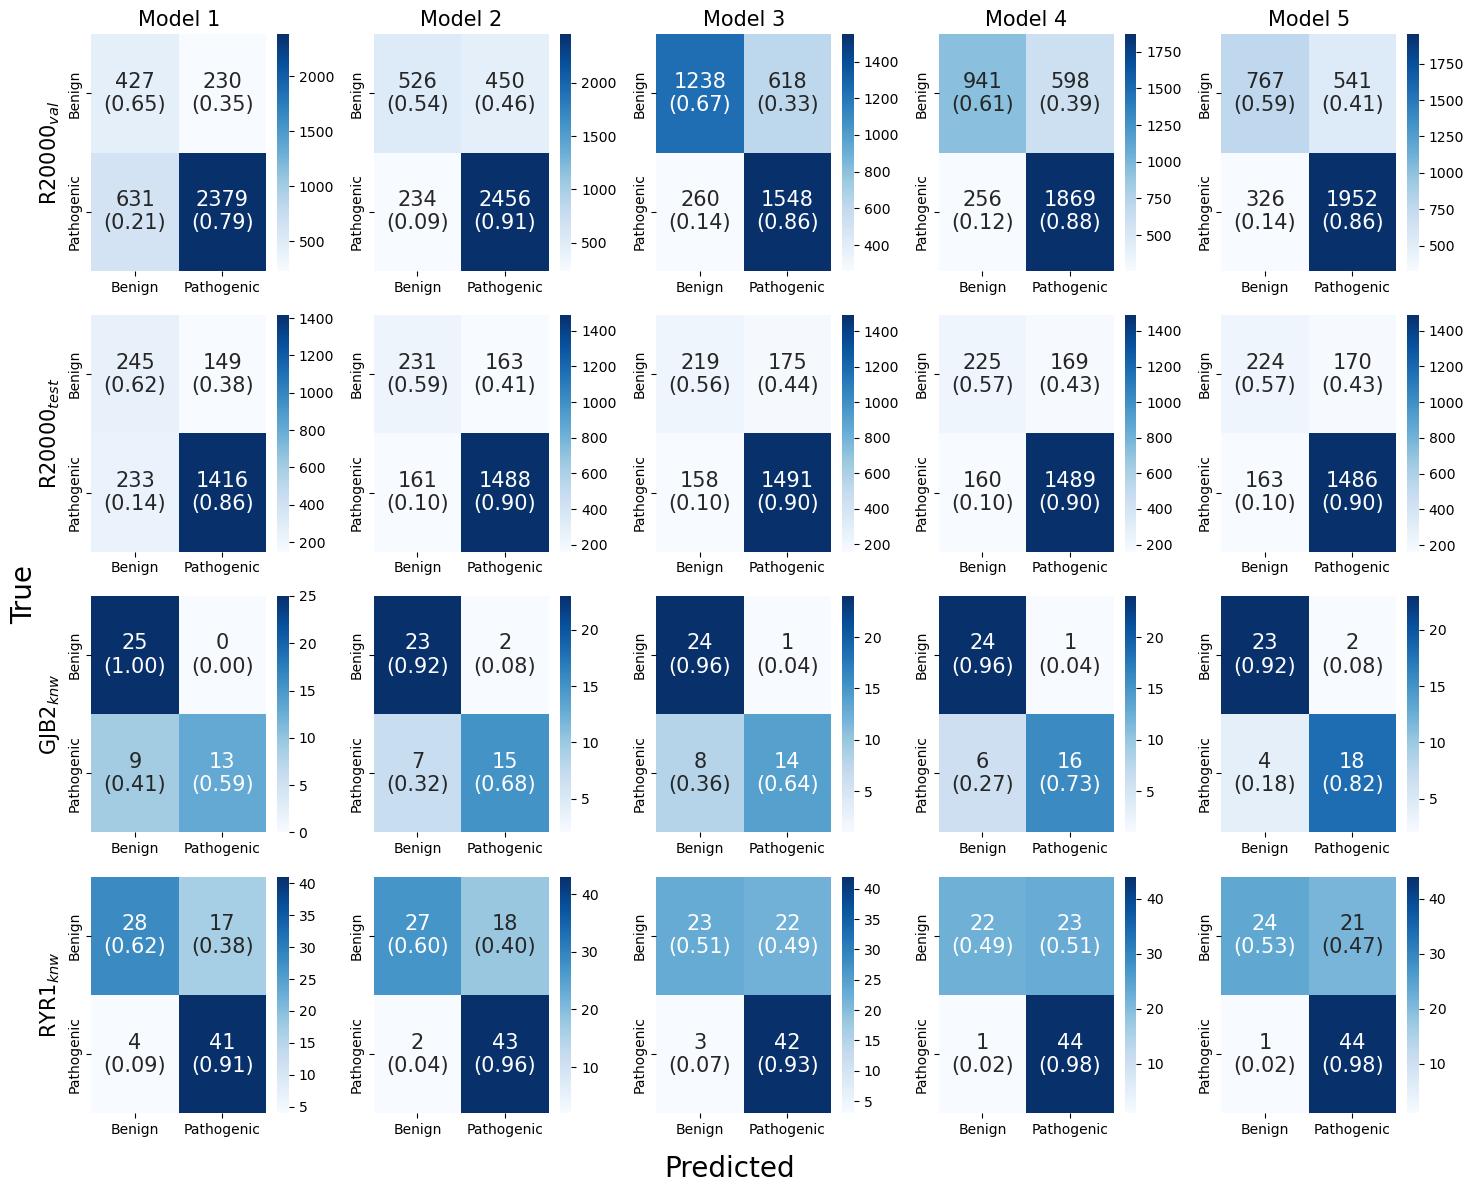

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# sns.heatmap(val_confusion[0], annot=True, fmt='d', cmap='Blues', )

# Plot confusion matrix
# 5 columns: model 1, model 2, model 3, model 4, model 5
# 4 rows: val, test, GJB2, RYR1
fig, axs = plt.subplots(4, 5, figsize=(15, 12))
for col in range(5):
    sns.heatmap(val_confusion[col], annot=val_confusion_text[col], fmt='', cmap='Blues', ax=axs[0, col], xticklabels=['Benign', 'Pathogenic'], yticklabels=['Benign', 'Pathogenic'], annot_kws={"fontsize":15})
    sns.heatmap(test_confusion[col], annot=test_confusion_text[col], fmt='', cmap='Blues', ax=axs[1, col], xticklabels=['Benign', 'Pathogenic'], yticklabels=['Benign', 'Pathogenic'], annot_kws={"fontsize":15})
    sns.heatmap(GJB2_confusion[col], annot=GJB2_confusion_text[col], fmt='', cmap='Blues', ax=axs[2, col], xticklabels=['Benign', 'Pathogenic'], yticklabels=['Benign', 'Pathogenic'], annot_kws={"fontsize":15})
    sns.heatmap(RYR1_confusion[col], annot=RYR1_confusion_text[col], fmt='', cmap='Blues', ax=axs[3, col], xticklabels=['Benign', 'Pathogenic'], yticklabels=['Benign', 'Pathogenic'], annot_kws={"fontsize":15})

# Label for each row
axs[0, 0].set_ylabel(r'R20000$_{val}$', fontsize=15)
axs[1, 0].set_ylabel(r'R20000$_{test}$', fontsize=15)
axs[2, 0].set_ylabel(r'GJB2$_{knw}$', fontsize=15)
axs[3, 0].set_ylabel(r'RYR1$_{knw}$', fontsize=15)

# Label for each column
axs[0, 0].set_title('Model 1', fontsize=15)
axs[0, 1].set_title('Model 2', fontsize=15)
axs[0, 2].set_title('Model 3', fontsize=15)
axs[0, 3].set_title('Model 4', fontsize=15)
axs[0, 4].set_title('Model 5', fontsize=15)

fig.supxlabel('Predicted', fontsize=20)
fig.supylabel('True', fontsize=20)

fig.tight_layout()
plt.show()

### ROC curve

In [30]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('default')

# Calculate ROC curve
val_fpr = []
val_tpr = []
val_auc = []
test_fpr = []
test_tpr = []
test_auc = []
GJB2_fpr = []
GJB2_tpr = []
GJB2_auc = []
RYR1_fpr = []
RYR1_tpr = []
RYR1_auc = []

for i, model in enumerate(_6hl_models):
    # Val
    val_pred = model.predict(folds[i]['val']['x'])
    fpr, tpr, _ = roc_curve(folds[i]['val']['y'][:, 1], val_pred[:, 1])
    val_fpr.append(fpr)
    val_tpr.append(tpr)
    val_auc.append(auc(fpr, tpr))

    # Test
    test_pred = model.predict(folds[i]['test']['x'])
    fpr, tpr, _ = roc_curve(folds[i]['test']['y'][:, 1], test_pred[:, 1])
    test_fpr.append(fpr)
    test_tpr.append(tpr)
    test_auc.append(auc(fpr, tpr))

    # GJB2
    GJB2_pred = model.predict(GJB2_notnan_features)
    fpr, tpr, _ = roc_curve(GJB2_notnan_labels[:, 1], GJB2_pred[:, 1])
    GJB2_fpr.append(fpr)
    GJB2_tpr.append(tpr)
    GJB2_auc.append(auc(fpr, tpr))

    # RYR1
    RYR1_pred = model.predict(RYR1_notnan_features)
    fpr, tpr, _ = roc_curve(RYR1_notnan_labels[:, 1], RYR1_pred[:, 1])
    RYR1_fpr.append(fpr)
    RYR1_tpr.append(tpr)
    RYR1_auc.append(auc(fpr, tpr))

  1/115 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


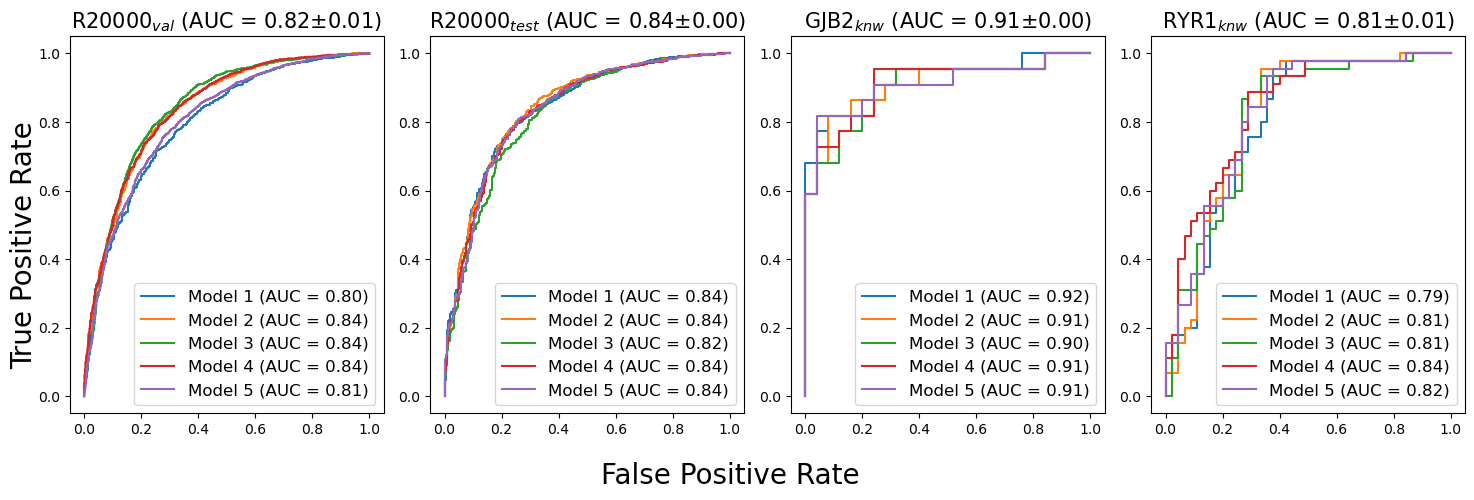

In [20]:
# Plot ROC curve
# 4 plots: val, test, GJB2, RYR1
# Each plot shows values of 5 models and their AUC, respectively.
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i in range(5):
    axs[0].plot(val_fpr[i], val_tpr[i], label=f'Model {i+1} (AUC = {val_auc[i]:.2f})')
    axs[1].plot(test_fpr[i], test_tpr[i], label=f'Model {i+1} (AUC = {test_auc[i]:.2f})')
    axs[2].plot(GJB2_fpr[i], GJB2_tpr[i], label=f'Model {i+1} (AUC = {GJB2_auc[i]:.2f})')
    axs[3].plot(RYR1_fpr[i], RYR1_tpr[i], label=f'Model {i+1} (AUC = {RYR1_auc[i]:.2f})')

# Calculate mean and standard error of AUC
val_auc_mean = np.mean(val_auc)
val_auc_sem = np.std(val_auc) / np.sqrt(5)
test_auc_mean = np.mean(test_auc)
test_auc_sem = np.std(test_auc) / np.sqrt(5)
GJB2_auc_mean = np.mean(GJB2_auc)
GJB2_auc_sem = np.std(GJB2_auc) / np.sqrt(5)
RYR1_auc_mean = np.mean(RYR1_auc)
RYR1_auc_sem = np.std(RYR1_auc) / np.sqrt(5)


# Set labels
axs[0].set_title(r'R20000$_{val}$' + f' (AUC = {val_auc_mean:.2f}±{val_auc_sem:.2f})', fontsize=15)
axs[1].set_title(r'R20000$_{test}$' + f' (AUC = {test_auc_mean:.2f}±{test_auc_sem:.2f})', fontsize=15)
axs[2].set_title(r'GJB2$_{knw}$' + f' (AUC = {GJB2_auc_mean:.2f}±{GJB2_auc_sem:.2f})', fontsize=15)
axs[3].set_title(r'RYR1$_{knw}$' + f' (AUC = {RYR1_auc_mean:.2f}±{RYR1_auc_sem:.2f})', fontsize=15)

# Set x, y labels
for ax in axs:
    # ax.set_xlabel('False Positive Rate', fontsize=15)
    # ax.set_ylabel('True Positive Rate', fontsize=15)
    # ax.plot([0, 1], [0, 1], 'k--', label='Random')
    ax.legend(fontsize=12)

fig.supxlabel('False Positive Rate', fontsize=20)
fig.supylabel('True Positive Rate', fontsize=20)
fig.tight_layout()
plt.show()


### Other metrics

In [40]:
import pandas as pd
df_evaluations = pd.read_csv(f'{_6hl}/evaluations.csv')
# Calculate mean and sem, add to df_evaluations
df_evaluations.loc['mean'] = df_evaluations.mean()
df_evaluations.loc['sem'] = df_evaluations.sem()
df_evaluations

,val_loss,val_accuracy,val_auc,val_precision,val_recall,test_loss,test_accuracy,test_auc,test_precision,test_recall,GJB2_notnan_loss,GJB2_notnan_accuracy,GJB2_notnan_auc,GJB2_notnan_precision,GJB2_notnan_recall,RYR1_notnan_loss,RYR1_notnan_accuracy,RYR1_notnan_auc,RYR1_notnan_precision,RYR1_notnan_recall
0,0.509655,0.765203,0.845130,0.765203,0.765203,0.431834,0.813020,0.894377,0.813020,0.813020,0.444502,0.808511,0.889090,0.808511,0.808511,0.586372,0.766667,0.791728,0.766667,0.766667
1,0.439280,0.813148,0.888392,0.813148,0.813148,0.407063,0.841410,0.909111,0.841410,0.841410,0.431933,0.808511,0.907651,0.808511,0.808511,0.561090,0.777778,0.805556,0.777778,0.777778
2,0.529831,0.760371,0.835653,0.760371,0.760371,0.414779,0.837004,0.903361,0.837004,0.837004,0.459777,0.808511,0.885921,0.808511,0.808511,0.593155,0.722222,0.777839,0.722222,0.722222
3,0.510544,0.766648,0.845148,0.766648,0.766648,0.409928,0.838962,0.907349,0.838962,0.838962,0.435344,0.851064,0.912857,0.851064,0.851064,0.588532,0.733333,0.779568,0.733333,0.733333
4,0.529213,0.758226,0.831426,0.758226,0.758226,0.411452,0.837004,0.906599,0.837004,0.837004,0.444764,0.872340,0.909009,0.872340,0.872340,0.571889,0.755556,0.792161,0.755556,0.755556
mean,0.503705,0.772719,0.849150,0.772719,0.772719,0.415011,0.833480,0.904159,0.833480,0.833480,0.443264,0.829787,0.900905,0.829787,0.829787,0.580207,0.751111,0.789370,0.751111,0.751111
sem,0.013621,0.008347,0.008303,0.008347,0.008347,0.003581,0.004228,0.002137,0.004228,0.004228,0.003948,0.010987,0.004539,0.010987,0.010987,0.004864,0.008413,0.004100,0.008413,0.008413


In [47]:
print(f'val_accuracy: {df_evaluations.loc["mean"]["val_accuracy"] * 100:.1f}±{df_evaluations.loc["sem"]["val_accuracy"] * 100:.1f}')
print(f'test_accuracy: {df_evaluations.loc["mean"]["test_accuracy"] * 100:.1f}±{df_evaluations.loc["sem"]["test_accuracy"] * 100:.1f}')
print(f'GJB2_notnan_accuracy: {df_evaluations.loc["mean"]["GJB2_notnan_accuracy"] * 100:.1f}±{df_evaluations.loc["sem"]["GJB2_notnan_accuracy"] * 100:.1f}')
print(f'RYR1_notnan_accuracy: {df_evaluations.loc["mean"]["RYR1_notnan_accuracy"] * 100:.1f}±{df_evaluations.loc["sem"]["RYR1_notnan_accuracy"] * 100:.1f}')

print(f'val_precision: {df_evaluations.loc["mean"]["val_precision"] * 100:.1f}±{df_evaluations.loc["sem"]["val_precision"] * 100:.1f}')
print(f'test_precision: {df_evaluations.loc["mean"]["test_precision"] * 100:.1f}±{df_evaluations.loc["sem"]["test_precision"] * 100:.1f}')
print(f'GJB2_notnan_precision: {df_evaluations.loc["mean"]["GJB2_notnan_precision"] * 100:.1f}±{df_evaluations.loc["sem"]["GJB2_notnan_precision"] * 100:.1f}')
print(f'RYR1_notnan_precision: {df_evaluations.loc["mean"]["RYR1_notnan_precision"] * 100:.1f}±{df_evaluations.loc["sem"]["RYR1_notnan_precision"] * 100:.1f}')

print(f'val_recall: {df_evaluations.loc["mean"]["val_recall"] * 100:.1f}±{df_evaluations.loc["sem"]["val_recall"] * 100:.1f}')
print(f'test_recall: {df_evaluations.loc["mean"]["test_recall"] * 100:.1f}±{df_evaluations.loc["sem"]["test_recall"] * 100:.1f}')
print(f'GJB2_notnan_recall: {df_evaluations.loc["mean"]["GJB2_notnan_recall"] * 100:.1f}±{df_evaluations.loc["sem"]["GJB2_notnan_recall"] * 100:.1f}')
print(f'RYR1_notnan_recall: {df_evaluations.loc["mean"]["RYR1_notnan_recall"] * 100:.1f}±{df_evaluations.loc["sem"]["RYR1_notnan_recall"] * 100:.1f}')

print(f'val_auc: {df_evaluations.loc["mean"]["val_auc"] * 100:.1f}±{df_evaluations.loc["sem"]["val_auc"] * 100:.1f}')
print(f'test_auc: {df_evaluations.loc["mean"]["test_auc"] * 100:.1f}±{df_evaluations.loc["sem"]["test_auc"] * 100:.1f}')
print(f'GJB2_notnan_auc: {df_evaluations.loc["mean"]["GJB2_notnan_auc"] * 100:.1f}±{df_evaluations.loc["sem"]["GJB2_notnan_auc"] * 100:.1f}')
print(f'RYR1_notnan_auc: {df_evaluations.loc["mean"]["RYR1_notnan_auc"] * 100:.1f}±{df_evaluations.loc["sem"]["RYR1_notnan_auc"] * 100:.1f}')


val_accuracy: 77.3±0.8
test_accuracy: 83.3±0.4
GJB2_notnan_accuracy: 83.0±1.1
RYR1_notnan_accuracy: 75.1±0.8
val_precision: 77.3±0.8
test_precision: 83.3±0.4
GJB2_notnan_precision: 83.0±1.1
RYR1_notnan_precision: 75.1±0.8
val_recall: 77.3±0.8
test_recall: 83.3±0.4
GJB2_notnan_recall: 83.0±1.1
RYR1_notnan_recall: 75.1±0.8
val_auc: 84.9±0.8
test_auc: 90.4±0.2
GJB2_notnan_auc: 90.1±0.5
RYR1_notnan_auc: 78.9±0.4


# 6 hidden layers - Transfer Learning

In [52]:
import os
import tensorflow as tf 
transfer_GJB2 = '/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_GJB2/GJB2-20250419-1200-seed-73'
transfer_RYR1 = './logs/thesis-transfer_RYR1/improve-20240707-0850-seed-150-n_hidden-6'
seed = 17
models = [os.path.join(transfer_GJB2, f'model_{i}') for i in range(5)]
models = [[os.path.join(folder, f'model_fold_{i}.h5') for i in range(1, 4)] for folder in models]
# Platten the list
models = [model for sublist in models for model in sublist]
models = [tf.keras.models.load_model(model) for model in models]

## GJB2

Validation: t = 1.87, p = 0.08
Test: t = 6.08, p = 0.00
GJB2_val: t = -2.43, p = 0.03
GJB2_test: t = -2.65, p = 0.02
GJB2_val_accuracy improves 3.98% in average
GJB2_test_accuracy improves 7.25% in average
TANDEM GJB2_val_accuracy: 83.8 ± 0.4
TANDEM GJB2_test_accuracy: 92.0 ± 4.4
TANDEM_GJB2 GJB2_val_accuracy: 87.1 ± 0.5
TANDEM_GJB2 GJB2_test_accuracy: 98.7 ± 1.2


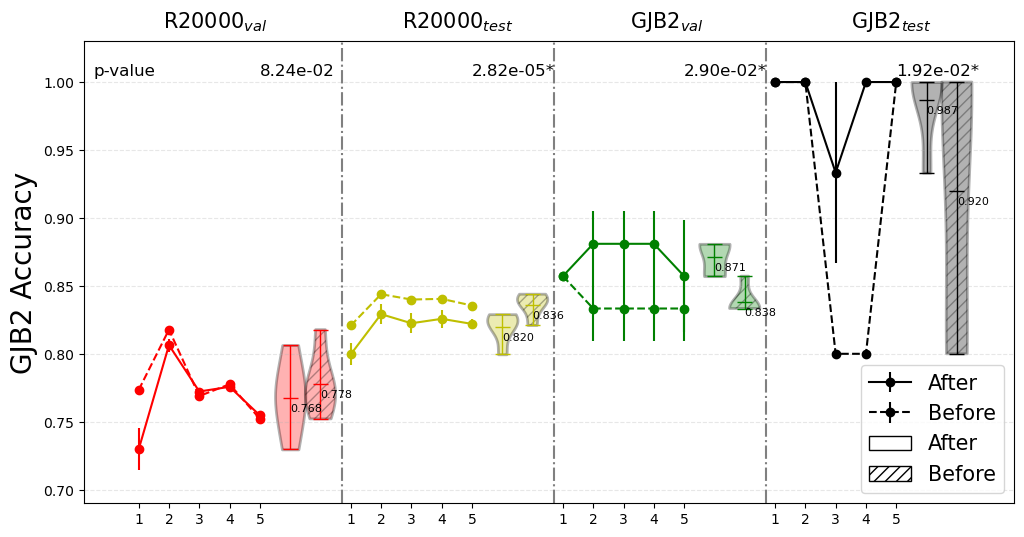

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_baseline = pd.read_csv(f'{transfer_GJB2}/baseline.csv')
df_best = pd.read_csv(f'{transfer_GJB2}/best.csv')
index = ' '.join([f'mean_{i} std_{i} sem_{i}' for i in range(5)]).split()
df_baseline.index = index
df_best.index = index

# Extract data
def extract_data(df, prefix, metrics):
    return [[df.loc[f'{prefix}_{i}'][metric] for i in range(5)] for metric in metrics]

metrics = ['R20000_val_accuracy', 'R20000_test_accuracy', 'val_accuracy', 'test_accuracy']
best_data = extract_data(df_best, 'mean', metrics)
best_errors = extract_data(df_best, 'sem', metrics)
base_data = extract_data(df_baseline, 'mean', metrics)
base_errors = extract_data(df_baseline, 'sem', metrics)

################## Calculate t-test ##################
from scipy.stats import ttest_rel
before_transfer = os.path.join(transfer_GJB2, 'before_transfer.csv')
after_transfer = os.path.join(transfer_GJB2, 'after_transfer.csv')
df_before_transfer = pd.read_csv(before_transfer)
df_after_transfer = pd.read_csv(after_transfer)
df_before_transfer = df_before_transfer[metrics]
df_after_transfer = df_after_transfer[metrics]
t_val = ttest_rel(df_before_transfer['R20000_val_accuracy'], df_after_transfer['R20000_val_accuracy'])
t_test = ttest_rel(df_before_transfer['R20000_test_accuracy'], df_after_transfer['R20000_test_accuracy'])
t_GJB2_val = ttest_rel(df_before_transfer['val_accuracy'], df_after_transfer['val_accuracy'])
t_GJB2_test = ttest_rel(df_before_transfer['test_accuracy'], df_after_transfer['test_accuracy'])

print(f'Validation: t = {t_val.statistic:.2f}, p = {t_val.pvalue:.2f}')
print(f'Test: t = {t_test.statistic:.2f}, p = {t_test.pvalue:.2f}')
print(f'GJB2_val: t = {t_GJB2_val.statistic:.2f}, p = {t_GJB2_val.pvalue:.2f}')
print(f'GJB2_test: t = {t_GJB2_test.statistic:.2f}, p = {t_GJB2_test.pvalue:.2f}')

# Plot data
plt.figure(figsize=(12, 6))
index = np.arange(5)
colors = ['r', 'y', 'g', 'k']
labels = ['Validation', 'Test', 'GJB2 Validation', 'GJB2 Test']
positions = [0, 7, 14, 21]

# Plot p-values
for i, (p, pos) in enumerate(zip([t_val.pvalue, t_test.pvalue, t_GJB2_val.pvalue, t_GJB2_test.pvalue], positions)):
    if p < 0.05:
        plt.text(pos+4, 1.005, f'{p:.2e}*', fontsize=12, color='black')
    elif np.isnan(p):
        continue
    else:
        plt.text(pos+4, 1.005, f'{p:.2e}', fontsize=12, color='black')
plt.text(-1.5, 1.005, 'p-value', fontsize=12, color='black')

for i, (best, base, best_err, base_err, color, label, pos) in enumerate(zip(best_data, base_data, best_errors, base_errors, colors, labels, positions)):
    plt.errorbar([x + pos for x in index], best, yerr=best_err, fmt=f'{color}-o')
    plt.errorbar([x + pos for x in index], base, yerr=base_err, fmt=f'{color}--o')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    parts = plt.violinplot([best, base], positions=[pos+5, pos+6], widths=1, showmeans=True, showextrema=True)
    plt.text(pos+5, np.mean(best)-0.01, f'{np.mean(best):.3f}', fontsize=8, color='black')
    plt.text(pos+6, np.mean(base)-0.01, f'{np.mean(base):.3f}', fontsize=8, color='black')

    parts['bodies'][1].set_hatch('///')
    for pc in parts['bodies']:
        pc.set_linewidth(2)
        pc.set_facecolor(color)
        pc.set_edgecolor('black')   
        pc.set_linestyle('solid')
    for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
        parts[partname].set_edgecolor(color)
        parts[partname].set_linewidth(1)

# How much GJB2_val_accuracy and GJB2_test_accuracy improve in average
GJB2_val_imp = np.mean([best_data[2][i] - base_data[2][i] for i in range(5)]) / np.mean(base_data[2])
GJB2_test_imp = np.mean([best_data[3][i] - base_data[3][i] for i in range(5)]) / np.mean(base_data[3])
print(f'GJB2_val_accuracy improves {GJB2_val_imp:.2%} in average')
print(f'GJB2_test_accuracy improves {GJB2_test_imp:.2%} in average')

print('TANDEM GJB2_val_accuracy: %.1f ± %.1f' % (np.mean(base_data[2]) * 100, np.std(base_data[2]) * 100 / np.sqrt(5)))
print('TANDEM GJB2_test_accuracy: %.1f ± %.1f' % (np.mean(base_data[3]) * 100, np.std(base_data[3]) * 100 / np.sqrt(5)))
print('TANDEM_GJB2 GJB2_val_accuracy: %.1f ± %.1f' % (np.mean(best_data[2]) * 100, np.std(best_data[2]) * 100 / np.sqrt(5)))
print('TANDEM_GJB2 GJB2_test_accuracy: %.1f ± %.1f' % (np.mean(best_data[3]) * 100, np.std(best_data[3]) * 100 / np.sqrt(5)))

# Plot GJB2_val_imp and GJB2_test_imp with arrow drawing
# plt.arrow(19+1, np.mean(best_data[2]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
# plt.arrow(26+1, np.mean(best_data[3]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
# plt.text(19+1+0.2, np.mean(best_data[2]), f'{GJB2_val_imp:.0%}', fontsize=12, color='r')
# plt.text(26+1+0.2, np.mean(best_data[3]), f'{GJB2_test_imp:.0%}', fontsize=12, color='r')

# Add labels
plt.errorbar([], [], yerr=[], fmt='k-o', label='After')
plt.errorbar([], [], yerr=[], fmt='k--o', label='Before')
plt.bar(0, 0, color='w', edgecolor='black', hatch='', label='After')
plt.bar(0, 0, color='w', edgecolor='black', hatch='///', label='Before')
# Customize plot
# plt.xlabel('General disease model', fontsize=20)
plt.ylabel('GJB2 Accuracy', fontsize=20)
# plt.title('Model performance (transfer learning to GJB2)', fontsize=20)
plt.xticks(labels=['1', '2', '3', '4', '5']*4, ticks=[0, 1, 2, 3, 4, 
                                                    7, 8, 9, 10, 11,
                                                    14, 15, 16, 17, 18,
                                                    21, 22, 23, 24, 25, ])
# Draw the vertical lines at 6.5, 13.5, 20.5
for i in range(3):
    plt.axvline(x=6.7 + 7*i, color='gray', linestyle='-.')

plt.xticks(labels=['1', '2', '3', '4', '5']*4, ticks=[0, 1, 2, 3, 4, 
                                                    7, 8, 9, 10, 11,
                                                    14, 15, 16, 17, 18,
                                                    21, 22, 23, 24, 25, ])
plt.text(0.8, 1.04, r'R20000$_{val}$', fontsize=15, color='black')
plt.text(8.7, 1.04, r'R20000$_{test}$', fontsize=15, color='black')
plt.text(16.2, 1.04, r'GJB2$_{val}$', fontsize=15, color='black')
plt.text(23.5, 1.04, r'GJB2$_{test}$', fontsize=15, color='black')
plt.legend(fontsize=15, loc='lower right')
plt.ylim(0.69, 1.03)
# Remove x-ticks for all subplots except the last row
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.show()

In [47]:
best_data[3], best_data[1], base_data[3]

([1.0, 1.0, 0.9333333373069764, 1.0, 1.0],
 [0.7996410528818766,
  0.8291727701822916,
  0.8224832812945048,
  0.8257464567820231,
  0.8219938079516093],
 [1.0, 1.0, 0.800000011920929, 0.800000011920929, 1.0])

In [ ]:

np.mean(best_data[3]), best_errors[3]

(0.9866666674613953, [0.0, 0.0, 0.0666666626930236, 0.0, 0.0])

Validation: t = 2.26, p = 0.04
Test: t = 11.43, p = 0.00
RYR1_val: t = -8.88, p = 0.00
RYR1_test: t = -4.00, p = 0.00
TANDEM RYR1_val_accuracy: 72.8 ± 0.6
TANDEM RYR1_test_accuracy: 60.0 ± 2.4
TANDEM_RYR1 RYR1_val_accuracy: 83.7 ± 0.8
TANDEM_RYR1 RYR1_test_accuracy: 65.9 ± 1.2
RYR1_val_accuracy improves 14.92% in average
RYR1_test_accuracy improves 9.88% in average


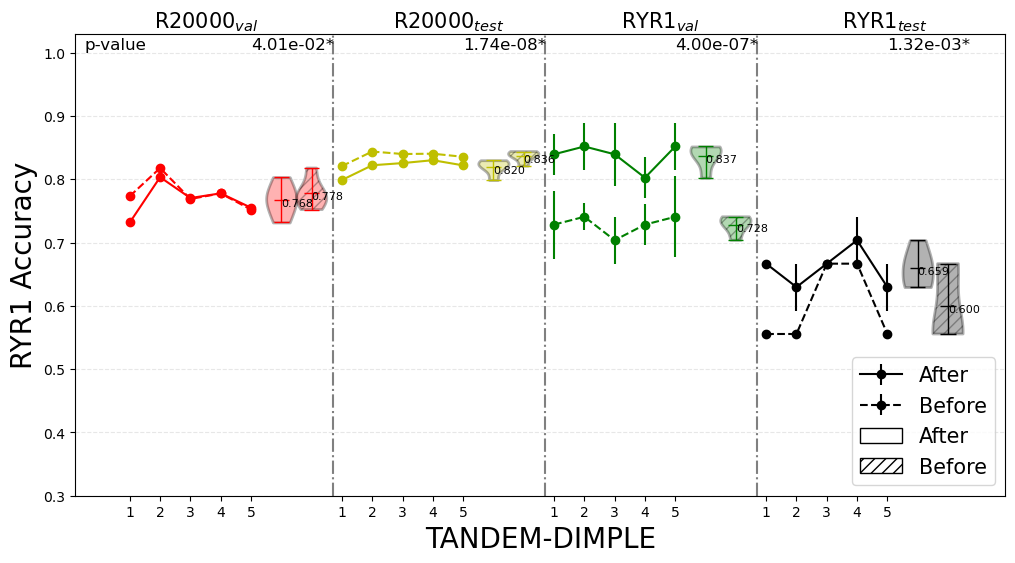

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf 
transfer_RYR1 = '/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_RYR1/RYR1-20250430-1144-seed-0'
transfer_RYR1 = '/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_RYR1/RYR1-20250419-1218-seed-100'
transfer_RYR1 = '/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_RYR1/RYR1-20250430-1135-seed-17'
seed = 0
# models = [os.path.join(transfer_RYR1, f'model_{i}') for i in range(5)]
# models = [[os.path.join(folder, f'model_fold_{i}.h5') for i in range(1, 4)] for folder in models]
# # Platten the list
# models = [model for sublist in models for model in sublist]
# models = [tf.keras.models.load_model(model) for model in models]

df_baseline = pd.read_csv(f'{transfer_RYR1}/baseline.csv')
df_best = pd.read_csv(f'{transfer_RYR1}/best.csv')
index = ' '.join([f'mean_{i} std_{i} sem_{i}' for i in range(5)]).split()
df_baseline.index = index
df_best.index = index

# Extract data
def extract_data(df, prefix, metrics):
    return [[df.loc[f'{prefix}_{i}'][metric] for i in range(5)] for metric in metrics]

metrics = ['R20000_val_accuracy', 'R20000_test_accuracy', 'val_accuracy', 'test_accuracy']
best_data = extract_data(df_best, 'mean', metrics)
best_errors = extract_data(df_best, 'sem', metrics)
base_data = extract_data(df_baseline, 'mean', metrics)
base_errors = extract_data(df_baseline, 'sem', metrics)

################## Calculate t-test ##################
from scipy.stats import ttest_rel
before_transfer = os.path.join(transfer_RYR1, 'before_transfer.csv')
after_transfer = os.path.join(transfer_RYR1, 'after_transfer.csv')
df_before_transfer = pd.read_csv(before_transfer)
df_after_transfer = pd.read_csv(after_transfer)
df_before_transfer = df_before_transfer[metrics]
df_after_transfer = df_after_transfer[metrics]
t_val = ttest_rel(df_before_transfer['R20000_val_accuracy'], df_after_transfer['R20000_val_accuracy'])
t_test = ttest_rel(df_before_transfer['R20000_test_accuracy'], df_after_transfer['R20000_test_accuracy'])
t_RYR1_val = ttest_rel(df_before_transfer['val_accuracy'], df_after_transfer['val_accuracy'])
t_RYR1_test = ttest_rel(df_before_transfer['test_accuracy'], df_after_transfer['test_accuracy'])

print(f'Validation: t = {t_val.statistic:.2f}, p = {t_val.pvalue:.2f}')
print(f'Test: t = {t_test.statistic:.2f}, p = {t_test.pvalue:.2f}')
print(f'RYR1_val: t = {t_RYR1_val.statistic:.2f}, p = {t_RYR1_val.pvalue:.2f}')
print(f'RYR1_test: t = {t_RYR1_test.statistic:.2f}, p = {t_RYR1_test.pvalue:.2f}')

print('TANDEM RYR1_val_accuracy: %.1f ± %.1f' % (np.mean(base_data[2]) * 100, np.std(base_data[2]) * 100 / np.sqrt(5)))
print('TANDEM RYR1_test_accuracy: %.1f ± %.1f' % (np.mean(base_data[3]) * 100, np.std(base_data[3]) * 100 / np.sqrt(5)))
print('TANDEM_RYR1 RYR1_val_accuracy: %.1f ± %.1f' % (np.mean(best_data[2]) * 100, np.std(best_data[2]) * 100 / np.sqrt(5)))
print('TANDEM_RYR1 RYR1_test_accuracy: %.1f ± %.1f' % (np.mean(best_data[3]) * 100, np.std(best_data[3]) * 100 / np.sqrt(5)))

# Plot data
plt.figure(figsize=(12, 6))
index = np.arange(5)
colors = ['r', 'y', 'g', 'k']
labels = ['Validation', 'Test', 'RYR1 Validation', 'RYR1 Test']
positions = [0, 7, 14, 21]

# Plot p-values
for i, (p, pos) in enumerate(zip([t_val.pvalue, t_test.pvalue, t_RYR1_val.pvalue, t_RYR1_test.pvalue], positions)):
    if p < 0.05:
        plt.text(pos+4, 1.005, f'{p:.2e}*', fontsize=12, color='black')
    elif np.isnan(p):
        continue
    else:
        plt.text(pos+4, 1.005, f'{p:.2e}', fontsize=12, color='black')
plt.text(-1.5, 1.005, 'p-value', fontsize=12, color='black')

for i, (best, base, best_err, base_err, color, label, pos) in enumerate(zip(best_data, base_data, best_errors, base_errors, colors, labels, positions)):
    plt.errorbar([x + pos for x in index], best, yerr=best_err, fmt=f'{color}-o')
    plt.errorbar([x + pos for x in index], base, yerr=base_err, fmt=f'{color}--o')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    parts = plt.violinplot([best, base], positions=[pos+5, pos+6], widths=1, showmeans=True, showextrema=True)
    plt.text(pos+5, np.mean(best)-0.01, f'{np.mean(best):.3f}', fontsize=8, color='black')
    plt.text(pos+6, np.mean(base)-0.01, f'{np.mean(base):.3f}', fontsize=8, color='black')

    parts['bodies'][1].set_hatch('///')
    for pc in parts['bodies']:
        pc.set_linewidth(2)
        pc.set_facecolor(color)
        pc.set_edgecolor('black')   
        pc.set_linestyle('solid')
    for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
        parts[partname].set_edgecolor(color)
        parts[partname].set_linewidth(1)

# How much RYR1_val_accuracy and GJB2_test_accuracy improve in average
RYR1_val_imp = np.mean([best_data[2][i] - base_data[2][i] for i in range(5)]) / np.mean(base_data[2])
RYR1_test_imp = np.mean([best_data[3][i] - base_data[3][i] for i in range(5)]) / np.mean(base_data[3])
print(f'RYR1_val_accuracy improves {RYR1_val_imp:.2%} in average')
print(f'RYR1_test_accuracy improves {RYR1_test_imp:.2%} in average')

# Add labels
plt.errorbar([], [], yerr=[], fmt='k-o', label='After')
plt.errorbar([], [], yerr=[], fmt='k--o', label='Before')
plt.bar(0, 0, color='w', edgecolor='black', hatch='', label='After')
plt.bar(0, 0, color='w', edgecolor='black', hatch='///', label='Before')
# Customize plot
plt.xlabel('TANDEM-DIMPLE', fontsize=20)
plt.ylabel('RYR1 Accuracy', fontsize=20)
plt.xticks(labels=['1', '2', '3', '4', '5']*4, ticks=[0, 1, 2, 3, 4, 
                                                    7, 8, 9, 10, 11,
                                                    14, 15, 16, 17, 18,
                                                    21, 22, 23, 24, 25, ])
# Draw the vertical lines at 6.5, 13.5, 20.5
for i in range(3):
    plt.axvline(x=6.7 + 7*i, color='gray', linestyle='-.')

plt.text(0.8, 1.04, r'R20000$_{val}$', fontsize=15, color='black')
plt.text(8.7, 1.04, r'R20000$_{test}$', fontsize=15, color='black')
plt.text(16.2, 1.04, r'RYR1$_{val}$', fontsize=15, color='black')
plt.text(23.5, 1.04, r'RYR1$_{test}$', fontsize=15, color='black')
plt.legend(fontsize=15, loc='lower right')
# plt.ylim(0.6, 1.03)
# plt.ylim(0.6, 1.03)
plt.ylim(0.3, 1.03)
# Remove x-ticks for all subplots except the last row
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.show()

In [ ]:
best_data[3], best_data[1]

([0.9259259303410848, 1.0, 1.0, 0.9259259303410848, 1.0],
 [0.7962147196133932,
  0.8201990524927775,
  0.8223201036453247,
  0.8252569635709127,
  0.8201990524927775],
 [0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544])

In [84]:
import pandas as pd
transfer_RYR1 = '/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_RYR1/RYR1-20250430-1135-seed-17'
df = pd.read_csv("/mnt/nas_1/YangLab/loci/tandem/logs/TransferLearning_RYR1/RYR1-20250430-1135-seed-17/best.csv")
df = df.iloc[[0, 3, 6, 9, 12]]
acc = df['knw_accuracy'].mean()
print("acurracy: %.1f ± %.1f" % (acc * 100, df['knw_accuracy'].std() * 100 / np.sqrt(5)))
df

acurracy: 87.5 ± 0.1


,R20000_val_loss,R20000_val_accuracy,R20000_val_auc,R20000_val_precision,R20000_val_recall,R20000_test_loss,R20000_test_accuracy,R20000_test_auc,R20000_test_precision,R20000_test_recall,...,test_loss,test_accuracy,test_auc,test_precision,test_recall,knw_loss,knw_accuracy,knw_auc,knw_precision,knw_recall
0,0.649413,0.731752,0.795615,0.731752,0.731752,0.484698,0.798825,0.874345,0.798825,0.798825,...,0.676245,0.666667,0.761317,0.666667,0.666667,0.350793,0.874074,0.932016,0.874074,0.874074
3,0.487751,0.803328,0.876666,0.803328,0.803328,0.438605,0.822157,0.895543,0.822157,0.822157,...,0.721698,0.629630,0.773663,0.629630,0.629630,0.340863,0.874074,0.935802,0.874074,0.874074
6,0.575495,0.770350,0.841795,0.770350,0.770350,0.440814,0.825583,0.898173,0.825583,0.825583,...,0.569867,0.666667,0.831276,0.666667,0.666667,0.329110,0.877778,0.942634,0.877778,0.877778
9,0.552930,0.777808,0.852231,0.777808,0.777808,0.427507,0.830152,0.901555,0.830152,0.830152,...,0.535489,0.703704,0.843621,0.703704,0.703704,0.318277,0.877778,0.947325,0.877778,0.877778
12,0.577900,0.755130,0.826746,0.755130,0.755130,0.436846,0.821994,0.895450,0.821994,0.821994,...,0.644543,0.629630,0.786008,0.629630,0.629630,0.328837,0.870370,0.942798,0.870370,0.870370


In [43]:
import sys 
addpath = '/mnt/nas_1/YangLab/loci/tandem'
sys.path.append(addpath)
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.train.run import train_model, use_all_gpus, get_config, getR20000, getTestset
from src.train.modules import np_to_dataset
from src.utils.settings import FEAT_STATS, dynamics_feat, structure_feat, seq_feat
from src.utils.settings import TANDEM_R20000, TANDEM_GJB2, TANDEM_RYR1, CLUSTER
from src.utils.settings import RHAPSODY_R20000, RHAPSODY_GJB2, RHAPSODY_RYR1, CLUSTER
from src.utils.settings import TANDEM_PKD1, CLUSTER, ROOT_DIR, RHAPSODY_FEATS
from src.train.config import model_config

df_stats = pd.read_csv(FEAT_STATS)
t_sel_feats = df_stats.sort_values('ttest_rank').head(33)['feature'].values
sel_DYNfeats = [feat for feat in t_sel_feats if feat in dynamics_feat.keys()]
sel_STRfeats = [feat for feat in t_sel_feats if feat in structure_feat.keys()]
sel_SEQfeats = [feat for feat in t_sel_feats if feat in seq_feat.keys()]
t_sel_feats = sel_DYNfeats + sel_STRfeats + sel_SEQfeats
##################### 3. Set up data #####################
folds, R20000, preprocess_feat = getR20000(TANDEM_R20000, CLUSTER, feat_names=t_sel_feats)
GJB2_knw, GJB2_unk = getTestset(TANDEM_GJB2, t_sel_feats, preprocess_feat) 
RYR1_knw, RYR1_unk = getTestset(TANDEM_RYR1, t_sel_feats, preprocess_feat)

GJB2_notnan_SAV_coords, GJB2_notnan_labels, GJB2_notnan_features = GJB2_knw
RYR1_notnan_SAV_coords, RYR1_notnan_labels, RYR1_notnan_features = RYR1_knw
GJB2_nan_SAV_coords, GJB2_nan_labels, GJB2_nan_features = GJB2_unk
RYR1_nan_SAV_coords, RYR1_nan_labels, RYR1_nan_features = RYR1_unk

# np_to_ds GJB2 and RYR1
GJB2_nan_ds = np_to_dataset(GJB2_nan_features, GJB2_nan_labels, shuffle=False, batch_size=300, seed=seed)
GJB2_notnan_ds = np_to_dataset(GJB2_notnan_features, GJB2_notnan_labels, shuffle=False, batch_size=300, seed=seed)
RYR1_nan_ds = np_to_dataset(RYR1_nan_features, RYR1_nan_labels, shuffle=False, batch_size=300, seed=seed)
RYR1_notnan_ds = np_to_dataset(RYR1_notnan_features, RYR1_notnan_labels, shuffle=False, batch_size=300, seed=seed)

ERROR:src.train.split_data:**************************************************
ERROR:src.train.split_data:Missing values in the dataframe:
ERROR:src.train.split_data:consurf: 		 2
ERROR:src.train.split_data:ACNR: 		 2
ERROR:src.train.split_data:deltaPSIC: 		 1
ERROR:src.train.split_data:SF1: 		 11
ERROR:src.train.split_data:SF2: 		 11
ERROR:src.train.split_data:SF3: 		 11
ERROR:src.train.split_data:entropy: 		 3769
ERROR:src.train.split_data:ranked_MI: 		 3769
ERROR:src.train.split_data:Assigning the mean value of feature to the missing values
ERROR:src.train.split_data:Assigning mean value to consurf: -0.23
ERROR:src.train.split_data:Assigning mean value to ACNR: -0.18
ERROR:src.train.split_data:Assigning mean value to deltaPSIC: 1.83
ERROR:src.train.split_data:Assigning mean value to SF1: 0.50
ERROR:src.train.split_data:Assigning mean value to SF2: 0.67
ERROR:src.train.split_data:Assigning mean value to SF3: 0.76
ERROR:src.train.split_data:Assigning mean value to entropy: 1.65
ERROR:s

In [63]:
import numpy as np
accs = []
for model in models:
    preds = model.predict(GJB2_notnan_ds)
    pathogenic_probs = preds[:, 1]
    predictions = np.argmax(preds, axis=1)
    val_labels = np.argmax(GJB2_notnan_labels, axis=1)
    # Calculate accuracy
    accuracy = np.sum(predictions == val_labels) / len(val_labels)
    accs.append(accuracy*100)

print(f'Accuracy: {np.mean(accs):.1f}%±{np.std(accs) / len(accs):.1f}%')
# preds = models[0].predict(GJB2_notnan_ds)
# pathogenic_probs = preds[:, 1]
# predictions = np.argmax(preds, axis=1)
# val_labels = np.argmax(GJB2_notnan_labels, axis=1)
# # Calculate accuracy
# accuracy = np.sum(predictions == val_labels) / len(val_labels)
# accs.append(accuracy)
# print(f'Accuracy: {accuracy:.2f}')
# for SAV, prob, pred, label in zip(GJB2_notnan_SAV_coords, pathogenic_probs, predictions, val_labels):
# #     # print("%s\t%.2f\t%d\t%d", SAV, prob, pred, label)
#     print(f"{SAV}\t{prob:.3f}\t{pred}\t{label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Accuracy: 89.4%±0.2%


In [59]:
accs

[0.8723404255319149,
 0.9148936170212766,
 0.8723404255319149,
 0.8936170212765957,
 0.8936170212765957,
 0.851063829787234,
 0.9148936170212766,
 0.9148936170212766,
 0.8723404255319149,
 0.9361702127659575,
 0.9148936170212766,
 0.8723404255319149,
 0.8936170212765957,
 0.9148936170212766,
 0.8723404255319149]

In [4]:
(df_after_transfer['GJB2_test_accuracy'].std() / len(df_after_transfer['GJB2_test_accuracy']))*100

print_format = 'GJB2_val: %.1f±%.1f\nGJB2_test: %.1f±%.1f'
print("After transfer learning")
print(print_format % (df_after_transfer['GJB2_val_accuracy'].mean()*100, 
                      df_after_transfer['GJB2_val_accuracy'].std()*100 / np.sqrt(5),
                      df_after_transfer['GJB2_test_accuracy'].mean()*100, 
                      df_after_transfer['GJB2_test_accuracy'].std()*100 / np.sqrt(5))
)

print("Before transfer learning")
print(print_format % (df_before_transfer['GJB2_val_accuracy'].mean()*100, 
                      df_before_transfer['GJB2_val_accuracy'].std()*100 / np.sqrt(5),
                      df_before_transfer['GJB2_test_accuracy'].mean()*100, 
                      df_before_transfer['GJB2_test_accuracy'].std()*100 / np.sqrt(5)
)
)

After transfer learning
GJB2_val: 82.9±5.8
GJB2_test: 100.0±0.0
Before transfer learning
GJB2_val: 82.4±4.5
GJB2_test: 88.0±4.5


### Other metrics

In [8]:
df_before = pd.read_csv(f'{transfer_GJB2}/before_transfer.csv')
df_before.loc['mean'] = df_before.mean()
df_before.loc['sem'] = df_before.sem()
df_before

print(f'GJB2_val_accuracy: {df_before.loc["mean"]["GJB2_val_accuracy"] * 100:.1f}±{df_before.loc["sem"]["GJB2_val_accuracy"] * 100:.1f}')
print(f'GJB2_val_precision: {df_before.loc["mean"]["GJB2_val_precision"] * 100:.1f}±{df_before.loc["sem"]["GJB2_val_precision"] * 100:.1f}')
print(f'GJB2_val_recall: {df_before.loc["mean"]["GJB2_val_recall"] * 100:.1f}±{df_before.loc["sem"]["GJB2_val_recall"] * 100:.1f}')
print(f'GJB2_val_auc: {df_before.loc["mean"]["GJB2_val_auc"] * 100:.1f}±{df_before.loc["sem"]["GJB2_val_auc"] * 100:.1f}')

print(f'GJB2_test_accuracy: {df_before.loc["mean"]["GJB2_test_accuracy"] * 100:.1f}±{df_before.loc["sem"]["GJB2_test_accuracy"] * 100:.1f}')
print(f'GJB2_test_precision: {df_before.loc["mean"]["GJB2_test_precision"] * 100:.1f}±{df_before.loc["sem"]["GJB2_test_precision"] * 100:.1f}')
print(f'GJB2_test_recall: {df_before.loc["mean"]["GJB2_test_recall"] * 100:.1f}±{df_before.loc["sem"]["GJB2_test_recall"] * 100:.1f}')
print(f'GJB2_test_auc: {df_before.loc["mean"]["GJB2_test_auc"] * 100:.1f}±{df_before.loc["sem"]["GJB2_test_auc"] * 100:.1f}')

print('*'*50)

df_after = pd.read_csv(f'{transfer_GJB2}/after_transfer.csv')
df_after.loc['mean'] = df_after.mean()
df_after.loc['sem'] = df_after.sem()

print(f'GJB2_val_accuracy: {df_after.loc["mean"]["GJB2_val_accuracy"] * 100:.1f}±{df_after.loc["sem"]["GJB2_val_accuracy"] * 100:.1f}')
print(f'GJB2_val_precision: {df_after.loc["mean"]["GJB2_val_precision"] * 100:.1f}±{df_after.loc["sem"]["GJB2_val_precision"] * 100:.1f}')
print(f'GJB2_val_recall: {df_after.loc["mean"]["GJB2_val_recall"] * 100:.1f}±{df_after.loc["sem"]["GJB2_val_recall"] * 100:.1f}')
print(f'GJB2_val_auc: {df_after.loc["mean"]["GJB2_val_auc"] * 100:.1f}±{df_after.loc["sem"]["GJB2_val_auc"] * 100:.1f}')

print(f'GJB2_test_accuracy: {df_after.loc["mean"]["GJB2_test_accuracy"] * 100:.1f}±{df_after.loc["sem"]["GJB2_test_accuracy"] * 100:.1f}')
print(f'GJB2_test_precision: {df_after.loc["mean"]["GJB2_test_precision"] * 100:.1f}±{df_after.loc["sem"]["GJB2_test_precision"] * 100:.1f}')
print(f'GJB2_test_recall: {df_after.loc["mean"]["GJB2_test_recall"] * 100:.1f}±{df_after.loc["sem"]["GJB2_test_recall"] * 100:.1f}')
print(f'GJB2_test_auc: {df_after.loc["mean"]["GJB2_test_auc"] * 100:.1f}±{df_after.loc["sem"]["GJB2_test_auc"] * 100:.1f}')

GJB2_val_accuracy: 82.4±2.4
GJB2_val_precision: 82.4±2.4
GJB2_val_recall: 82.4±2.4
GJB2_val_auc: 89.0±2.2
GJB2_test_accuracy: 88.0±2.4
GJB2_test_precision: 88.0±2.4
GJB2_test_recall: 88.0±2.4
GJB2_test_auc: 94.4±1.4
**************************************************
GJB2_val_accuracy: 82.9±3.1
GJB2_val_precision: 82.9±3.1
GJB2_val_recall: 82.9±3.1
GJB2_val_auc: 91.8±1.8
GJB2_test_accuracy: 100.0±0.0
GJB2_test_precision: 100.0±0.0
GJB2_test_recall: 100.0±0.0
GJB2_test_auc: 100.0±0.0


#### Before transfer learning

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from run import get_seed
seed = get_seed(seed=2105)
from sklearn.model_selection import train_test_split
from modules import np_to_dataset, Preprocessing, plot_acc_loss_3fold_CV, Callback_CSVLogger, DelayedEarlyStopping
from sklearn.model_selection import StratifiedKFold

GJB2_val_f1 = []
GJB2_test_f1 = []
# GJB2_notnan_labels = np.argmax(GJB2_notnan_labels, axis=1)
GJB2_knw_labels = np.argmax(GJB2_notnan_labels, axis=1)
# 1. Split GJB2_notnan_ds into 3 folds (60% – 30% – 10%)
GJB2_x_train, GJB2_x_test, GJB2_y_train, GJB2_y_test = train_test_split(GJB2_notnan_features, GJB2_knw_labels, test_size=0.1, random_state=seed, stratify=GJB2_knw_labels)
# folds, R20000, GJB2_knw, GJB2_unk, RYR1_knw, RYR1_unk, P29033 = get_data()
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(GJB2_x_train, GJB2_y_train)):
    x_train, x_val = GJB2_x_train[train_idx], GJB2_x_train[val_idx]
    y_train, y_val = GJB2_y_train[train_idx], GJB2_y_train[val_idx]

    for j, model in enumerate(_6hl_models):
        # Calculate f1-score
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        GJB2_val_f1.append(f1_score(y_val, val_pred))

        test_pred = model.predict(GJB2_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        GJB2_test_f1.append(f1_score(GJB2_y_test, test_pred))

print(f'GJB2_val_f1: {np.mean(GJB2_val_f1) * 100:.1f}±{np.std(GJB2_val_f1) * 100 / np.sqrt(len(GJB2_val_f1)):.1f}')
print(f'GJB2_test_f1: {np.mean(GJB2_test_f1) * 100:.1f}±{np.std(GJB2_test_f1) * 100 / np.sqrt(len(GJB2_test_f1)):.1f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

#### After transfer learning

In [4]:
from run import get_config
from modules import build_optimizer
cfg = get_config(33, 6, 50)
optimizer = build_optimizer(cfg)

after_models = []
os.listdir(transfer_GJB2)
for _dir_ in ['model_0', 'model_1', 'model_2', 'model_3', 'model_4']:
    model_dir = os.path.join(transfer_GJB2, _dir_)
    for _model_ in ['model_fold_1.h5', 'model_fold_2.h5', 'model_fold_3.h5']:
        model_path = os.path.join(model_dir, _model_)
        model = tf.keras.models.load_model(model_path)
        model.compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
        after_models.append(model)

Input Layer: 33
Model Configuration: 
model:
  hidden:
    hidden_00:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_01:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_02:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_03:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_04:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_uniform
      l1: 0
      l2: 0.0001
      n_neurons: 33
    hidden_05:
      activation: gelu
      batch_norm: false
      dropout_rate: 0
      initializer: glorot_

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from run import get_seed
seed = get_seed(seed=2105)
from sklearn.model_selection import train_test_split
from modules import np_to_dataset, Preprocessing, plot_acc_loss_3fold_CV, Callback_CSVLogger, DelayedEarlyStopping
from sklearn.model_selection import StratifiedKFold

GJB2_val_f1 = []
GJB2_test_f1 = []
# GJB2_notnan_labels = np.argmax(GJB2_notnan_labels, axis=1)
# 1. Split GJB2_notnan_ds into 3 folds (60% – 30% – 10%)
GJB2_x_train, GJB2_x_test, GJB2_y_train, GJB2_y_test = train_test_split(GJB2_notnan_features, GJB2_knw_labels, test_size=0.1, random_state=seed, stratify=GJB2_knw_labels)
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(GJB2_x_train, GJB2_y_train)):
    x_train, x_val = GJB2_x_train[train_idx], GJB2_x_train[val_idx]
    y_train, y_val = GJB2_y_train[train_idx], GJB2_y_train[val_idx]

    for _dir_ in ['model_0', 'model_1', 'model_2', 'model_3', 'model_4']:
        model_dir = os.path.join(transfer_GJB2, _dir_)
        model_path = os.path.join(model_dir, f'model_fold_{i+1}.h5')
        model = tf.keras.models.load_model(model_path)
        model.compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        # Calculate f1-score
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        GJB2_val_f1.append(f1_score(y_val, val_pred))

        test_pred = model.predict(GJB2_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        GJB2_test_f1.append(f1_score(GJB2_y_test, test_pred))

print(f'GJB2_val_f1: {np.mean(GJB2_val_f1) * 100:.1f}±{np.std(GJB2_val_f1) * 100 / np.sqrt(len(GJB2_val_f1)):.1f}')
print(f'GJB2_test_f1: {np.mean(GJB2_test_f1) * 100:.1f}±{np.std(GJB2_test_f1) * 100 / np.sqrt(len(GJB2_test_f1)):.1f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
GJB2_val_f1: 83.0±3.2
GJB2_test_f1: 100.0±0.0


##### Confusion matrix

In [17]:
# Calculate confusion matrix for GJB2_val and GJB2_test
from sklearn.metrics import confusion_matrix
GJB2_val_confusion = dict()
GJB2_test_confusion = dict()

GJB2_x_train, GJB2_x_test, GJB2_y_train, GJB2_y_test = train_test_split(GJB2_notnan_features, GJB2_knw_labels, test_size=0.1, random_state=seed, stratify=GJB2_knw_labels)
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(GJB2_x_train, GJB2_y_train)):
    x_train, x_val = GJB2_x_train[train_idx], GJB2_x_train[val_idx]
    y_train, y_val = GJB2_y_train[train_idx], GJB2_y_train[val_idx]

    GJB2_val_confusion[i] = []
    GJB2_test_confusion[i] = []

    for _dir_ in ['model_0', 'model_1', 'model_2', 'model_3', 'model_4']:
        model_dir = os.path.join(transfer_GJB2, _dir_)
        model_path = os.path.join(model_dir, f'model_fold_{i+1}.h5')
        model = tf.keras.models.load_model(model_path)
        model.compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        # Calculate confusion matrix
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        GJB2_val_confusion[i].append(confusion_matrix(y_val, val_pred))

        test_pred = model.predict(GJB2_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        GJB2_test_confusion[i].append(confusion_matrix(GJB2_y_test, test_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [37]:
# GJB2_val_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in GJB2_val_confusion]
# GJB2_test_confusion_norm = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in GJB2_test_confusion]
# GJB2_val_confusion, GJB2_val_confusion_norm
GJB2_val_confusion_norm = dict()
GJB2_val_confusion_text = dict()
for k in GJB2_val_confusion.keys():
    _confusion_matrix_ = GJB2_val_confusion[k]
    _confusion_matrix_norm_ = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in _confusion_matrix_]
    GJB2_val_confusion_norm[k] = _confusion_matrix_norm_
    GJB2_val_confusion_text[k] = with_and_without_norm_confusion_matrix(_confusion_matrix_, _confusion_matrix_norm_)

GJB2_test_confusion_norm = dict()
GJB2_test_confusion_text = dict()
for k in GJB2_test_confusion.keys():
    _confusion_matrix_ = GJB2_test_confusion[k]
    _confusion_matrix_norm_ = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in _confusion_matrix_]
    GJB2_test_confusion_norm[k] = _confusion_matrix_norm_
    GJB2_test_confusion_text[k] = with_and_without_norm_confusion_matrix(_confusion_matrix_, _confusion_matrix_norm_)

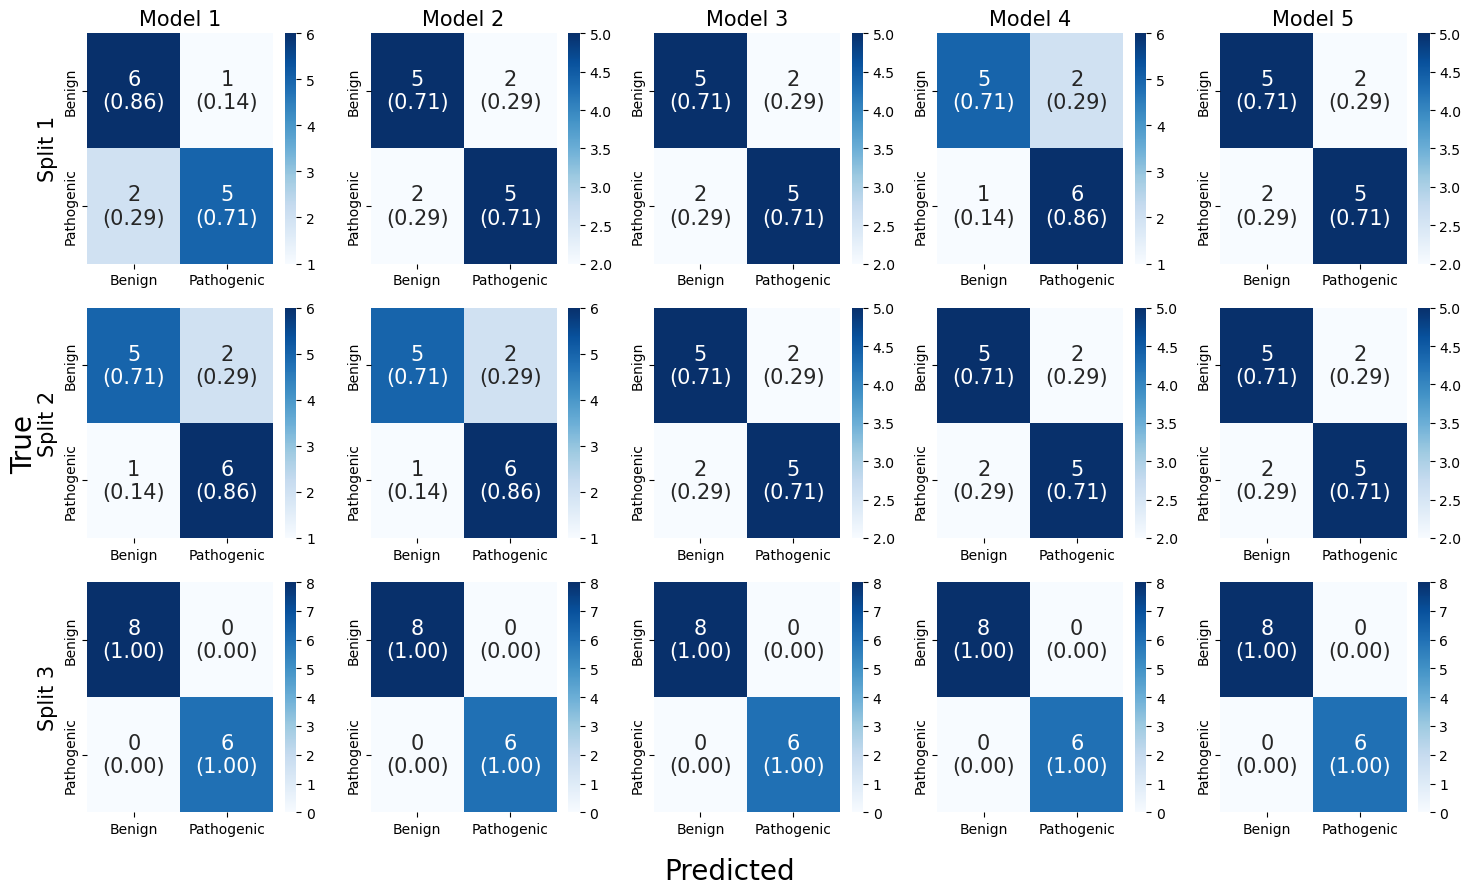

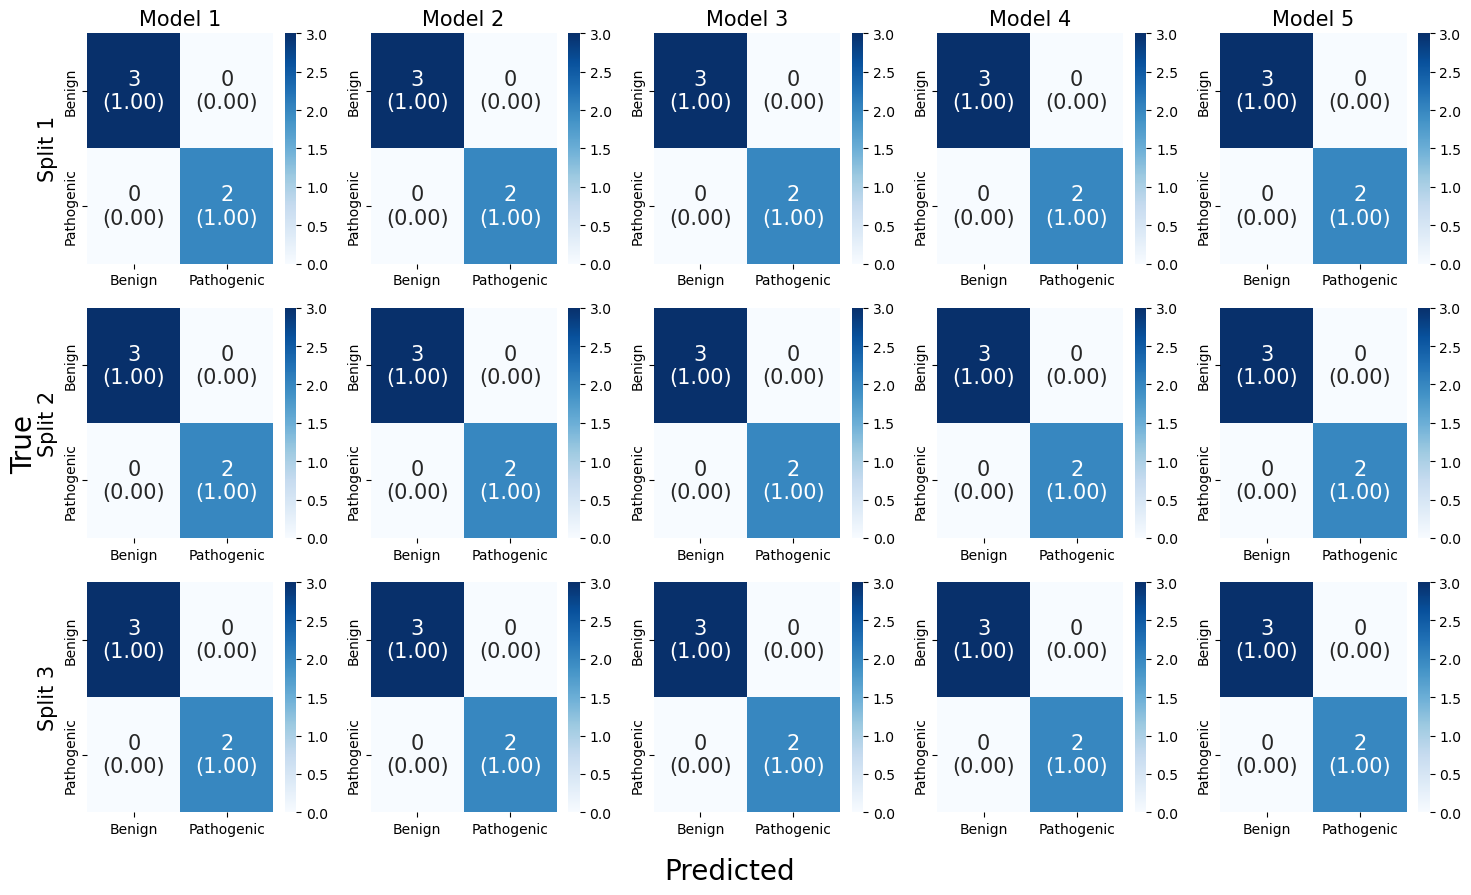

In [38]:
# Plot confusion matrix
# 3 rows: Split 1, Split 2, Split 3
# 5 columns: Model 1, Model 2, Model 3, Model 4, Model 5
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')


fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for row in range(3):
    for col in range(5):
        sns.heatmap(GJB2_val_confusion[row][col], 
                    annot=GJB2_val_confusion_text[row][col], 
                    fmt='', cmap='Blues', ax=axs[row, col], 
                    xticklabels=['Benign', 'Pathogenic'], 
                    yticklabels=['Benign', 'Pathogenic'], 
                    annot_kws={"fontsize":15})

# Label for each row
axs[0, 0].set_ylabel('Split 1', fontsize=15)
axs[1, 0].set_ylabel('Split 2', fontsize=15)
axs[2, 0].set_ylabel('Split 3', fontsize=15)

# Label for each column
axs[0, 0].set_title('Model 1', fontsize=15)
axs[0, 1].set_title('Model 2', fontsize=15)
axs[0, 2].set_title('Model 3', fontsize=15)
axs[0, 3].set_title('Model 4', fontsize=15)
axs[0, 4].set_title('Model 5', fontsize=15)

fig.supxlabel('Predicted', fontsize=20)
fig.supylabel('True', fontsize=20)
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for row in range(3):
    for col in range(5):
        sns.heatmap(GJB2_test_confusion[row][col], annot=GJB2_test_confusion_text[row][col], fmt='', cmap='Blues', ax=axs[row, col], xticklabels=['Benign', 'Pathogenic'], yticklabels=['Benign', 'Pathogenic'], annot_kws={"fontsize":15})

# Label for each row
axs[0, 0].set_ylabel('Split 1', fontsize=15)
axs[1, 0].set_ylabel('Split 2', fontsize=15)
axs[2, 0].set_ylabel('Split 3', fontsize=15)

# Label for each column
axs[0, 0].set_title('Model 1', fontsize=15)
axs[0, 1].set_title('Model 2', fontsize=15)
axs[0, 2].set_title('Model 3', fontsize=15)
axs[0, 3].set_title('Model 4', fontsize=15)
axs[0, 4].set_title('Model 5', fontsize=15)

fig.supxlabel('Predicted', fontsize=20)
fig.supylabel('True', fontsize=20)
fig.tight_layout()
plt.show()

### Training history

In [7]:
stop_epoch = []
for model in range(5):
    history_files = [os.path.join(transfer_GJB2, f'model_{model}', f'history_fold_{i}.csv') for i in range(3)]
    history_data = [pd.read_csv(file) for file in history_files]
    max_length = max(len(history) for history in history_data)
    stop_epoch.append(max_length)
stop_epoch

[300, 300, 300, 300, 300]

#### Accuracy

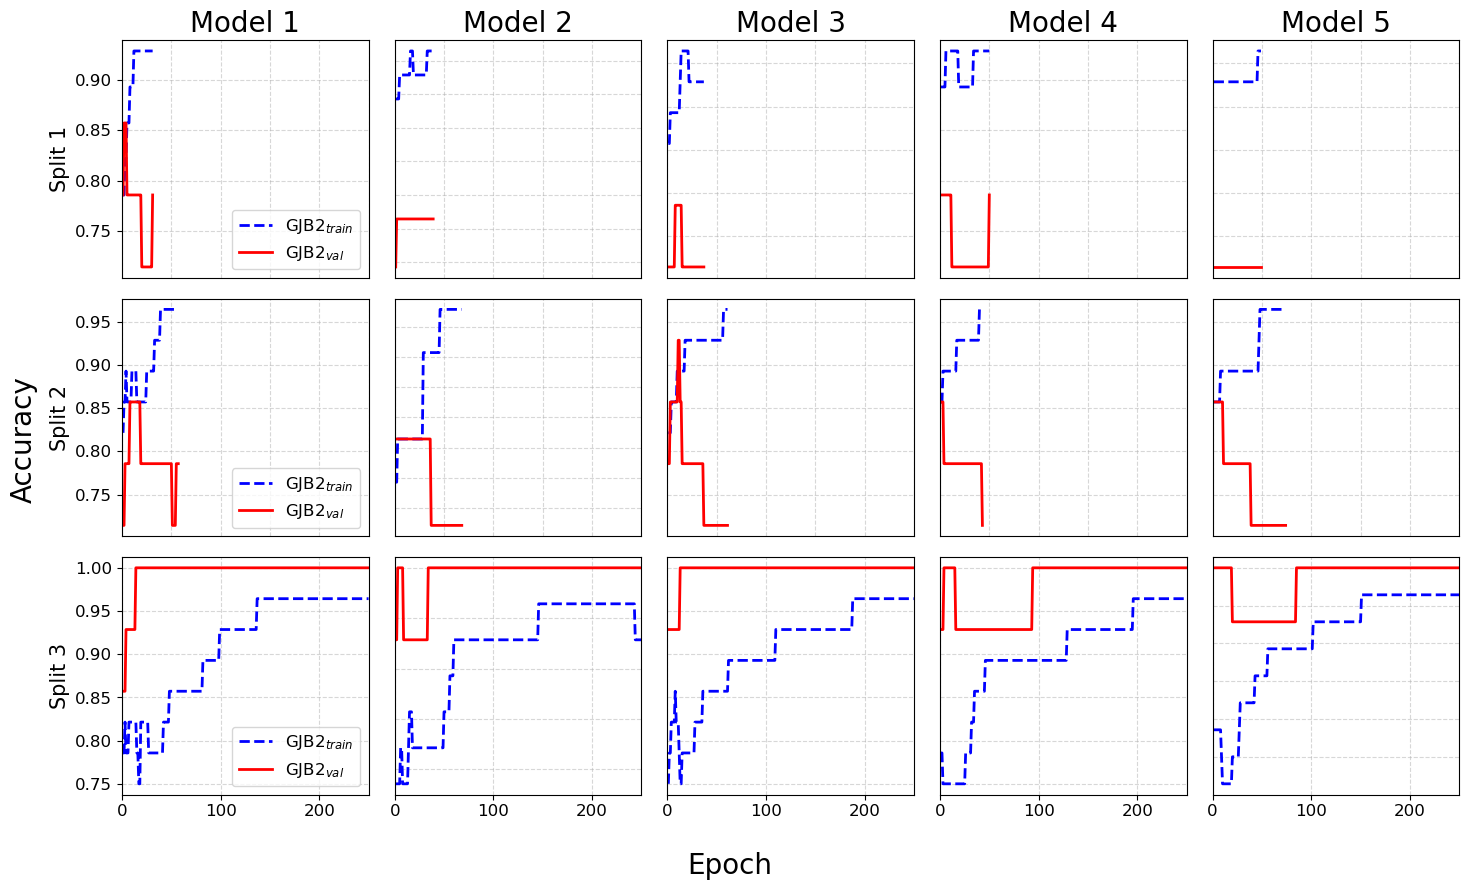

In [9]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_GJB2, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]

        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['GJB2_train_accuracy'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['GJB2_val_accuracy'], 'r-', linewidth=2)
        # axs[split_idx, model_idx].set_ylim(0.65, 0.95)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.5)
    axs[split_idx, 0].legend([r'GJB2$_{train}$', r'GJB2$_{val}$'], fontsize=12, loc='lower right')

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50) 

# fig.suptitle('Training history of GJB2 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Accuracy', fontsize=20)
fig.tight_layout(pad=1.5)
plt.show()


#### Loss

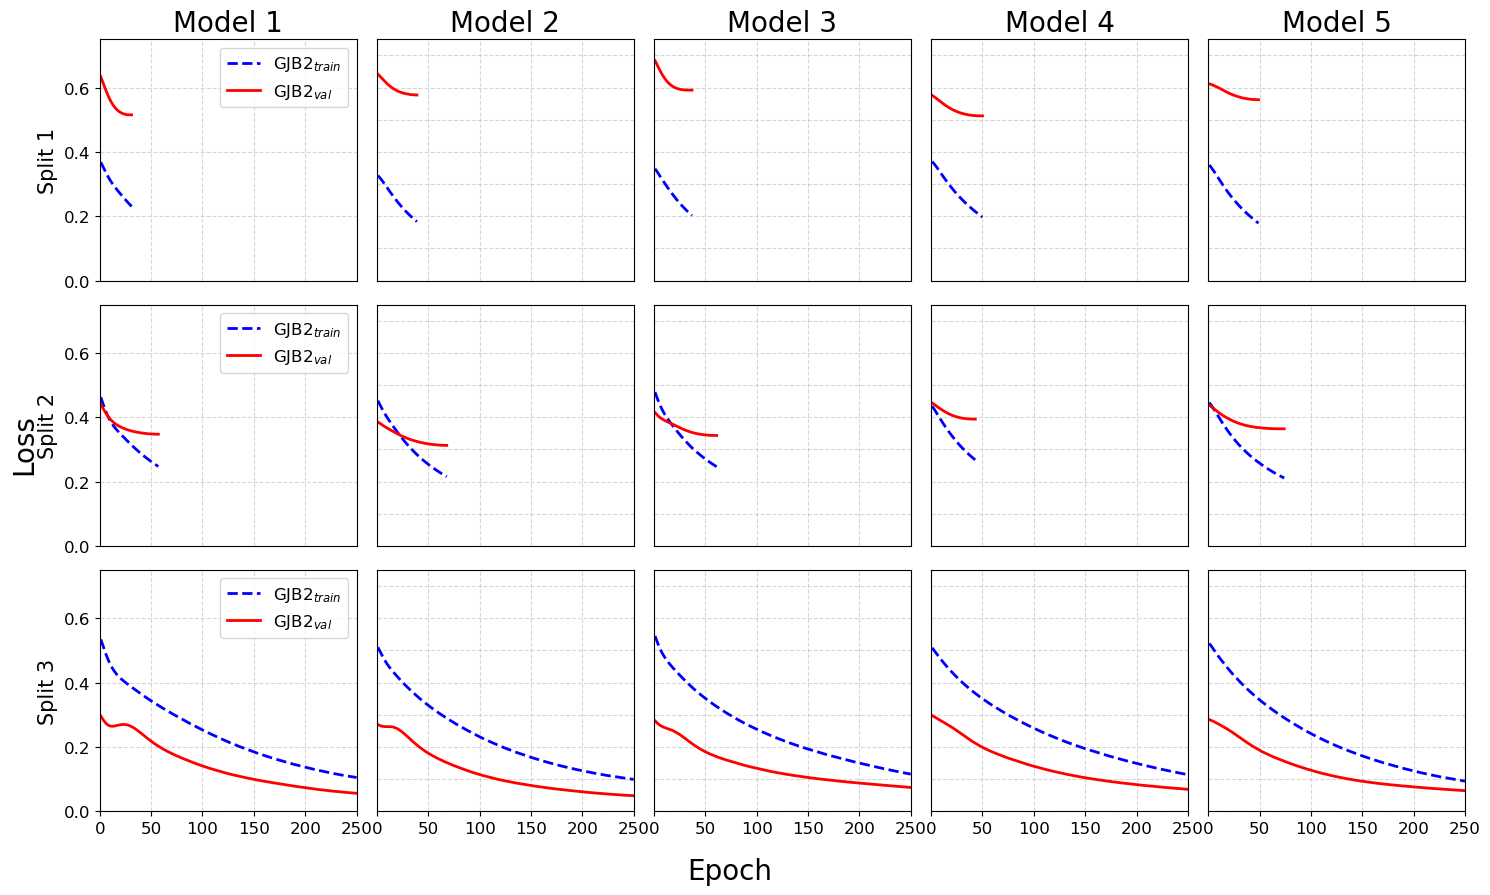

In [10]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_GJB2, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['GJB2_train_loss'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['GJB2_val_loss'], 'r-', linewidth=2)
        axs[split_idx, model_idx].set_ylim(0, 0.75)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.5)
    axs[split_idx, 0].legend([r'GJB2$_{train}$', r'GJB2$_{val}$'], fontsize=12, loc='upper right')

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50) 

# fig.suptitle('Training history of GJB2 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Loss', fontsize=20)
fig.tight_layout()
plt.show()

### Predict UNK GJB2 SAVs

In [5]:
GJB2_nan_pathogenicity_pred = pd.read_csv(os.path.join(transfer_GJB2, 'GJB2_nan_pathogenicity_pred_total.csv'))
GJB2_nan_pathogenicity_prob = pd.read_csv(os.path.join(transfer_GJB2, 'GJB2_nan_pathogenicity_prob_total.csv'))

# Sort GJB2_nan_pathogenicity_pred by final_prob
GJB2_nan_pathogenicity_pred = GJB2_nan_pathogenicity_pred.sort_values(by='final_prob', ascending=False)
# GJB2_nan_pathogenicity_prob reindex based on GJB2_nan_pathogenicity_pred
GJB2_nan_pathogenicity_prob = GJB2_nan_pathogenicity_prob.reindex(GJB2_nan_pathogenicity_pred.index)

GJB2_nan_pathogenicity_pred = GJB2_nan_pathogenicity_pred.reset_index(drop=True)
GJB2_nan_pathogenicity_prob = GJB2_nan_pathogenicity_prob.reset_index(drop=True)

GJB2_nan_pathogenicity_pred.head(2)


,SAV_coords,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,final,ratio,final_prob,final_prob_sem
0,P29033 79 L R,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,0.992137,0.002416
1,P29033 60 C R,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,0.988404,0.002892


In [14]:
mutation = []
for i, row in GJB2_nan_pathogenicity_pred.iterrows():
    SAV_coord = row['SAV_coords'].split()
    mutation.append(f'{SAV_coord[2]}{SAV_coord[1]}{SAV_coord[3]}')
mutation[:2]

['L79R', 'C60R']

In [15]:
data = GJB2_nan_pathogenicity_prob[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']]

# Add GJB2_nan_pathogenicity_pred['final_prob'] to data
data['ratio'] = 0.5
data['final_prob'] = GJB2_nan_pathogenicity_pred['final_prob']
voting = GJB2_nan_pathogenicity_pred['ratio']
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,ratio,final_prob
0,0.973211,0.996829,0.999722,0.975308,0.997650,0.999826,0.979400,0.996611,0.999529,0.987163,0.992208,0.998928,0.987993,0.998368,0.999315,0.5,0.992137
1,0.974252,0.993709,0.998880,0.983856,0.997339,0.998403,0.973471,0.991884,0.997860,0.972093,0.967337,0.993890,0.988859,0.996233,0.997992,0.5,0.988404
2,0.987942,0.997724,0.999961,0.952687,0.991003,0.999637,0.946794,0.984713,0.999678,0.958862,0.967009,0.998916,0.972809,0.993450,0.999445,0.5,0.983375
3,0.940984,0.974101,0.999946,0.970293,0.988862,0.999972,0.958955,0.977083,0.999973,0.977175,0.967432,0.999966,0.980203,0.989815,0.999980,0.5,0.981649
4,0.984786,0.997024,0.999966,0.957113,0.991352,0.999862,0.931957,0.978865,0.999789,0.958491,0.967189,0.999489,0.965858,0.991663,0.999645,0.5,0.981536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.065331,0.086494,0.003425,0.026538,0.061021,0.003083,0.020593,0.057591,0.003464,0.029523,0.082418,0.004504,0.021340,0.053893,0.002326,0.5,0.034770
76,0.082602,0.061726,0.000747,0.048165,0.056404,0.001500,0.023074,0.030741,0.000278,0.029838,0.054349,0.000602,0.051221,0.038744,0.000506,0.5,0.032033
77,0.038848,0.051576,0.020004,0.020635,0.045471,0.014628,0.011983,0.037557,0.019864,0.023445,0.055474,0.022862,0.018704,0.042479,0.011561,0.5,0.029006
78,0.043105,0.031835,0.001833,0.026963,0.026288,0.001809,0.016484,0.022363,0.001030,0.033099,0.046437,0.002067,0.032490,0.031503,0.001461,0.5,0.021251


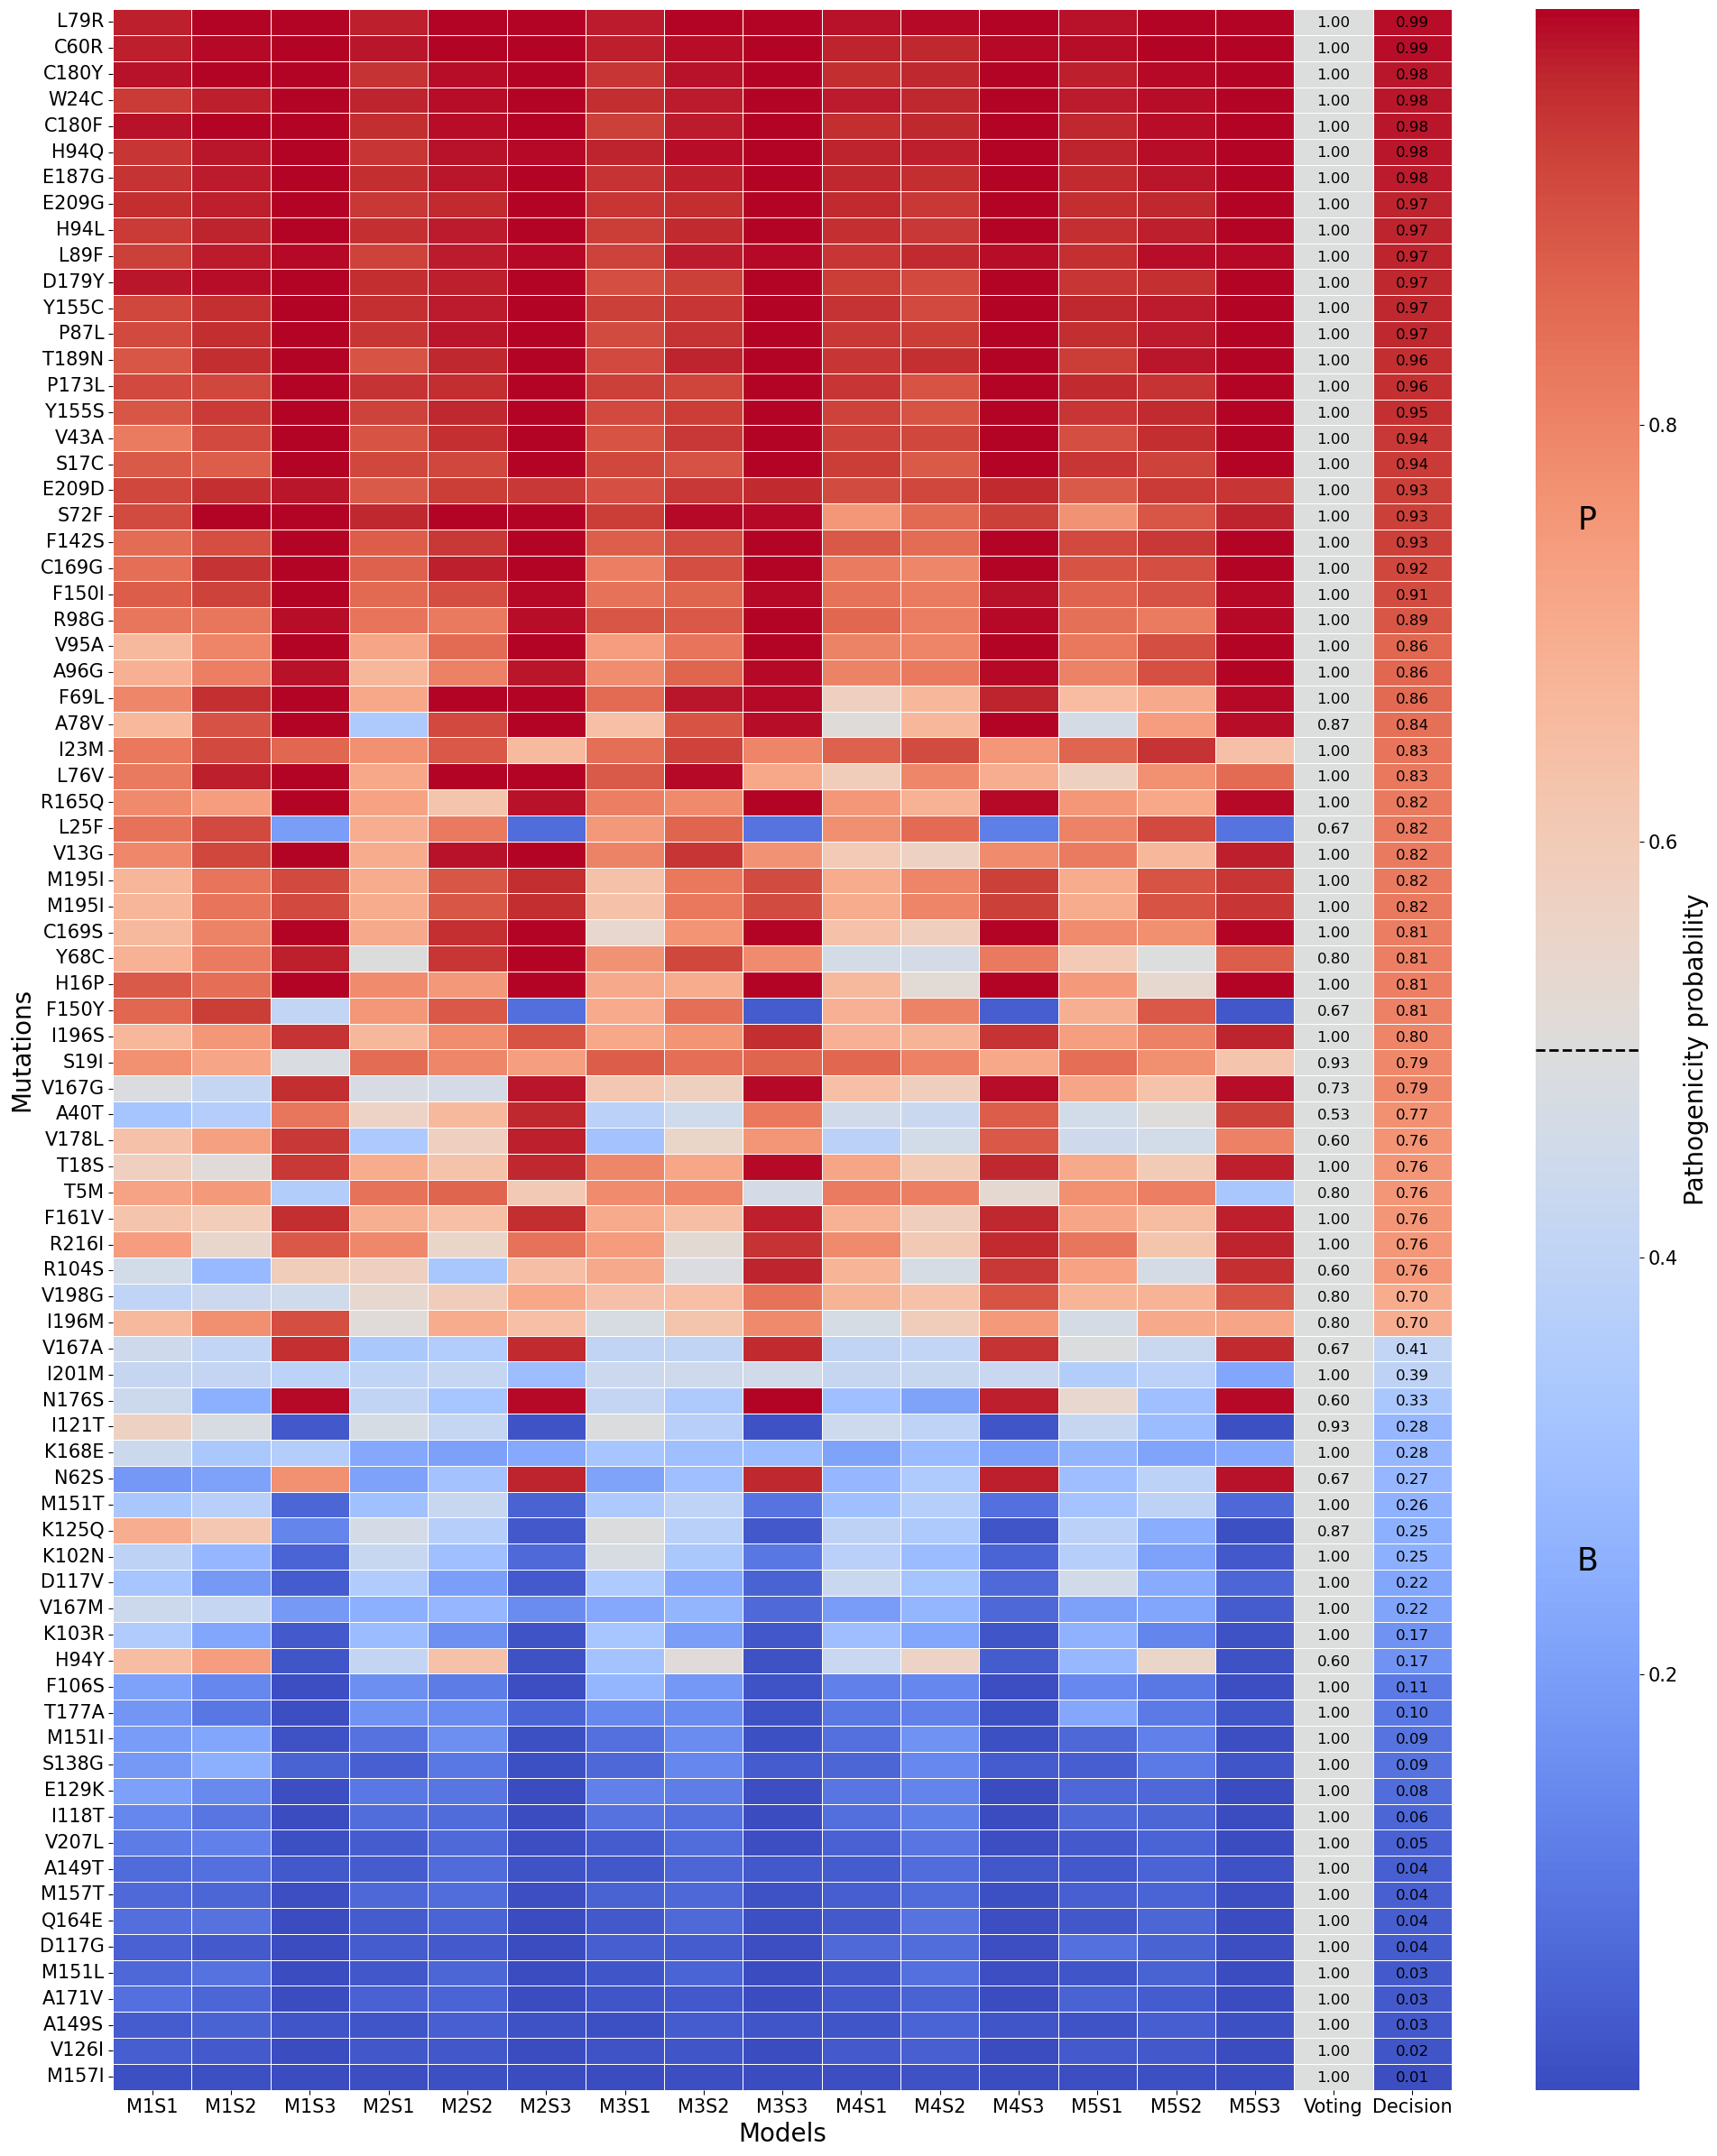

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the figure: 
# x-axis: SAV_coords, y-axis: 15 models prediction 

models = list(range(1, 16))
models = models + ['Voting'] + ['Decision'] 

plt.figure(figsize=(20, 24))
ax = sns.heatmap(data, cmap='coolwarm', cbar_kws={'label': 'Pathogenicity probability'}, 
                 linewidths=0.5,
                 )

# y-axis: mutation
# x-axis: models

# Customize the y-axis labels
ax.set_yticks(np.arange(len(mutation)) + 0.5)
ax.set_yticklabels(mutation, rotation=0)


x_ticks = ['M1S1', 'M1S2', 'M1S3', 'M2S1', 'M2S2', 'M2S3', 'M3S1', 'M3S2', 'M3S3', 'M4S1', 'M4S2', 'M4S3', 'M5S1', 'M5S2', 'M5S3', 'Voting', 'Decision']

# Customize the x-axis labels
ax.set_xticks(np.arange(len(models)) + 0.5)
# ax.set_xticklabels(models, rotation=0)
ax.set_xticklabels(x_ticks, rotation=0)

# Print the value of 'Decision' cell
for i in range(len(mutation)):
    ax.text(16.5, i+0.7, f'{data["final_prob"][i]:.2f}', fontsize=12, color='black', ha='center')

for i in range(len(mutation)):
    ax.text(15.5, i+0.7, f'{voting[i]:.2f}', fontsize=12, color='black', ha='center')

plt.xlabel('Models', fontsize=20)
plt.ylabel('Mutations', fontsize=20)
# plt.title('Pathogenicity prediction of GJB2 SAVs', fontsize=20)

# Size of color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

# Font size of cbar_kws
cbar.ax.yaxis.label.set_size(20)

# Please make a prediction to clearly show these VUS is predicted a pathogenic “P” or benign “B”. 
# Please mark P and B beside the color bar. 
# Separate the color bar into 2 parts: P and B, using dashed line.
cbar.set_ticks([0.2, 0.4, 0.6, 0.8])
cbar.ax.axhline(0.5, color='black', linestyle='--', linewidth=2)
cbar.ax.text(0.5, 0.25, 'B', fontsize=25, color='black', ha='center')
cbar.ax.text(0.5, 0.75, 'P', fontsize=25, color='black', ha='center')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


## GJB2_full

Validation: t = -2.12, p = 0.05
Test: t = -1.56, p = 0.14
GJB2_val: t = -2.97, p = 0.01
GJB2_test: t = -3.06, p = 0.01
GJB2_val_accuracy improves 3.22% in average
GJB2_test_accuracy improves 4.88% in average


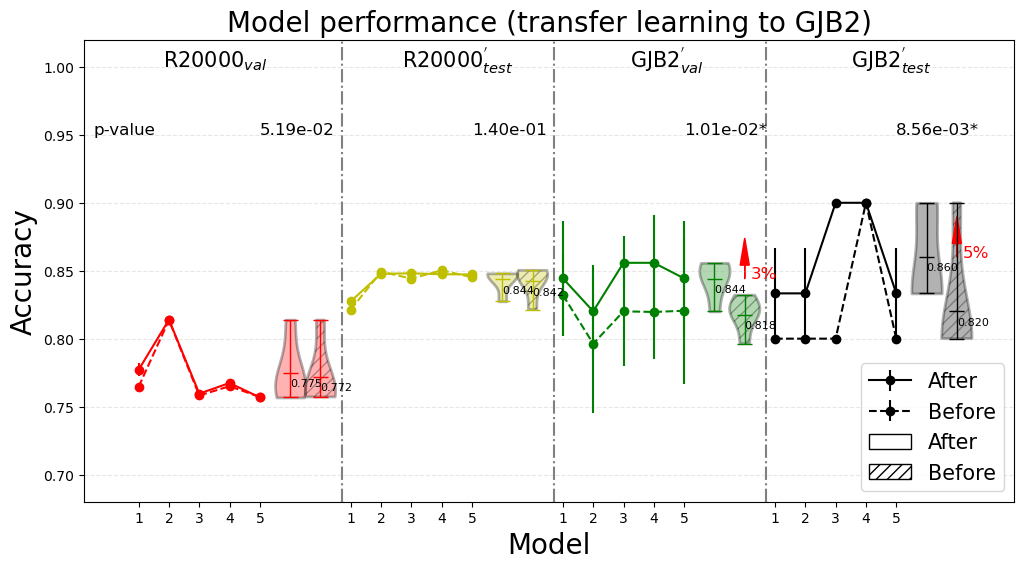

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df_baseline = pd.read_csv(f'{transfer_GJB2_full}/baseline.csv')
df_best = pd.read_csv(f'{transfer_GJB2_full}/best.csv')
index = ' '.join([f'mean_{i} std_{i} sem_{i}' for i in range(5)]).split()
df_baseline.index = index
df_best.index = index

# Extract data
def extract_data(df, prefix, metrics):
    return [[df.loc[f'{prefix}_{i}'][metric] for i in range(5)] for metric in metrics]

metrics = ['val_accuracy', 'test_accuracy', 'GJB2_val_accuracy', 'GJB2_test_accuracy']
best_data = extract_data(df_best, 'mean', metrics)
best_errors = extract_data(df_best, 'sem', metrics)
base_data = extract_data(df_baseline, 'mean', metrics)
base_errors = extract_data(df_baseline, 'sem', metrics)

################## Calculate t-test ##################
from scipy.stats import ttest_ind, ttest_rel
before_transfer = os.path.join(transfer_GJB2_full, 'before_transfer.csv')
after_transfer = os.path.join(transfer_GJB2_full, 'after_transfer.csv')
df_before_transfer = pd.read_csv(before_transfer)
df_after_transfer = pd.read_csv(after_transfer)
df_before_transfer = df_before_transfer[metrics]
df_after_transfer = df_after_transfer[metrics]
t_val = ttest_rel(df_before_transfer['val_accuracy'], df_after_transfer['val_accuracy'])
t_test = ttest_rel(df_before_transfer['test_accuracy'], df_after_transfer['test_accuracy'])
t_GJB2_val = ttest_rel(df_before_transfer['GJB2_val_accuracy'], df_after_transfer['GJB2_val_accuracy'])
t_GJB2_test = ttest_rel(df_before_transfer['GJB2_test_accuracy'], df_after_transfer['GJB2_test_accuracy'])
print(f'Validation: t = {t_val.statistic:.2f}, p = {t_val.pvalue:.2f}')
print(f'Test: t = {t_test.statistic:.2f}, p = {t_test.pvalue:.2f}')
print(f'GJB2_val: t = {t_GJB2_val.statistic:.2f}, p = {t_GJB2_val.pvalue:.2f}')
print(f'GJB2_test: t = {t_GJB2_test.statistic:.2f}, p = {t_GJB2_test.pvalue:.2f}')

# Plot data
plt.figure(figsize=(12, 6))
index = np.arange(5)
colors = ['r', 'y', 'g', 'k']
labels = ['Validation', 'Test', 'GJB2 Validation', 'GJB2 Test']
positions = [0, 7, 14, 21]

# Plot p-values
for i, (p, pos) in enumerate(zip([t_val.pvalue, t_test.pvalue, t_GJB2_val.pvalue, t_GJB2_test.pvalue], positions)):
    if p < 0.05:
        plt.text(pos+4, 0.95, f'{p:.2e}*', fontsize=12, color='black')
    elif np.isnan(p):
        continue
    else:
        plt.text(pos+4, 0.95, f'{p:.2e}', fontsize=12, color='black')
plt.text(-1.5, 0.95, 'p-value', fontsize=12, color='black')

for i, (best, base, best_err, base_err, color, label, pos) in enumerate(zip(best_data, base_data, best_errors, base_errors, colors, labels, positions)):
    plt.errorbar([x + pos for x in index], best, yerr=best_err, fmt=f'{color}-o')
    plt.errorbar([x + pos for x in index], base, yerr=base_err, fmt=f'{color}--o')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    parts = plt.violinplot([best, base], positions=[pos+5, pos+6], widths=1, showmeans=True, showextrema=True)
    plt.text(pos+5, np.mean(best)-0.01, f'{np.mean(best):.3f}', fontsize=8, color='black')
    plt.text(pos+6, np.mean(base)-0.01, f'{np.mean(base):.3f}', fontsize=8, color='black')

    parts['bodies'][1].set_hatch('///')
    for pc in parts['bodies']:
        pc.set_linewidth(2)
        pc.set_facecolor(color)
        pc.set_edgecolor('black')   
        pc.set_linestyle('solid')
    for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
        parts[partname].set_edgecolor(color)
        parts[partname].set_linewidth(1)

# How much GJB2_val_accuracy and GJB2_test_accuracy improve in average
GJB2_val_imp = np.mean([best_data[2][i] - base_data[2][i] for i in range(5)]) / np.mean(base_data[2])
GJB2_test_imp = np.mean([best_data[3][i] - base_data[3][i] for i in range(5)]) / np.mean(base_data[3])
print(f'GJB2_val_accuracy improves {GJB2_val_imp:.2%} in average')
print(f'GJB2_test_accuracy improves {GJB2_test_imp:.2%} in average')

# Plot GJB2_val_imp and GJB2_test_imp with arrow drawing
plt.arrow(19+1, np.mean(best_data[2]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
plt.arrow(26+1, np.mean(best_data[3]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
plt.text(19+1+0.2, np.mean(best_data[2]), f'{GJB2_val_imp:.0%}', fontsize=12, color='r')
plt.text(26+1+0.2, np.mean(best_data[3]), f'{GJB2_test_imp:.0%}', fontsize=12, color='r')

# Add labels
plt.errorbar([], [], yerr=[], fmt='k-o', label='After')
plt.errorbar([], [], yerr=[], fmt='k--o', label='Before')
plt.bar(0, 0, color='w', edgecolor='black', hatch='', label='After')
plt.bar(0, 0, color='w', edgecolor='black', hatch='///', label='Before')
# Customize plot
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Model performance (transfer learning to GJB2)', fontsize=20)
plt.xticks(labels=['1', '2', '3', '4', '5']*4, ticks=[0, 1, 2, 3, 4, 
                                                    7, 8, 9, 10, 11,
                                                    14, 15, 16, 17, 18,
                                                    21, 22, 23, 24, 25, ])
# Draw the vertical lines at 6.5, 13.5, 20.5
for i in range(3):
    plt.axvline(x=6.7 + 7*i, color='gray', linestyle='-.')

plt.text(0.8, 1, r'R20000$_{val}$', fontsize=15, color='black')
plt.text(8.7, 1, r"R20000$_{test}^{'}$", fontsize=15, color='black')
plt.text(16.2, 1, r"GJB2$_{val}^{'}$", fontsize=15, color='black')
plt.text(23.5, 1, r"GJB2$_{test}^{'}$", fontsize=15, color='black')
plt.legend(fontsize=15, loc='lower right')
plt.ylim(0.68, 1.02)
plt.show()

### Training history

In [7]:
import os
stop_epoch = []
for model in range(5):
    history_files = [os.path.join(transfer_GJB2_full, f'model_{model}', f'history_fold_{i}.csv') for i in range(3)]
    history_data = [pd.read_csv(file) for file in history_files]
    max_length = max(len(history) for history in history_data)
    stop_epoch.append(max_length)
stop_epoch

[121, 114, 99, 86, 80]

#### Accuracy

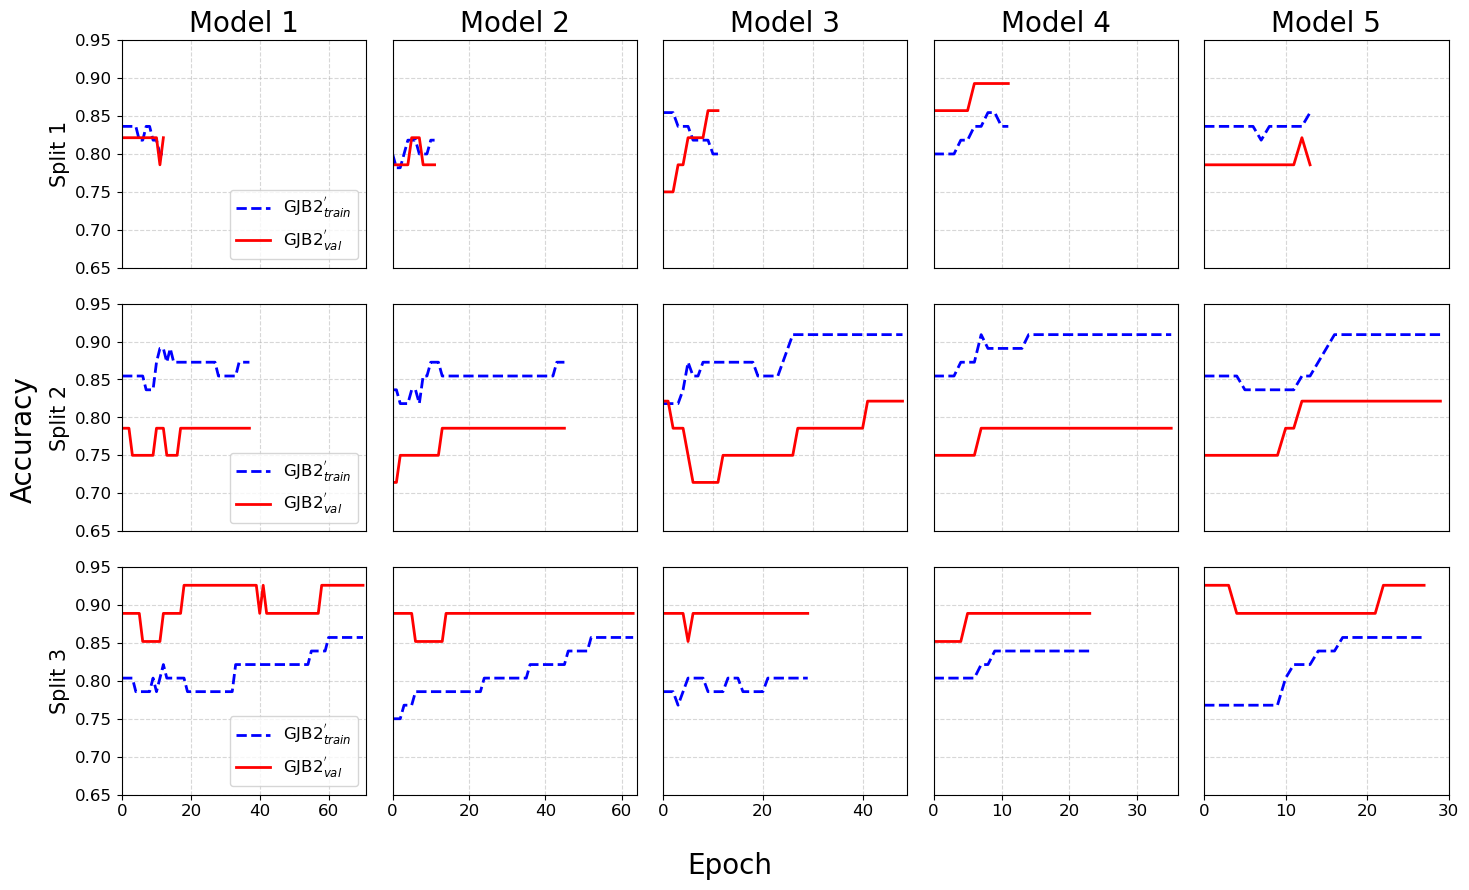

In [10]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_GJB2_full, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]

        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['accuracy'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['val_accuracy'], 'r-', linewidth=2)
        axs[split_idx, model_idx].set_ylim(0.65, 0.95)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.5)
    axs[split_idx, 0].legend([r"GJB2$_{train}^{'}$", r"GJB2$_{val}^{'}$"], fontsize=12, loc='lower right')

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50) 

# fig.suptitle('Training history of GJB2 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Accuracy', fontsize=20)
fig.tight_layout(pad=1.5)
plt.show()


#### Loss

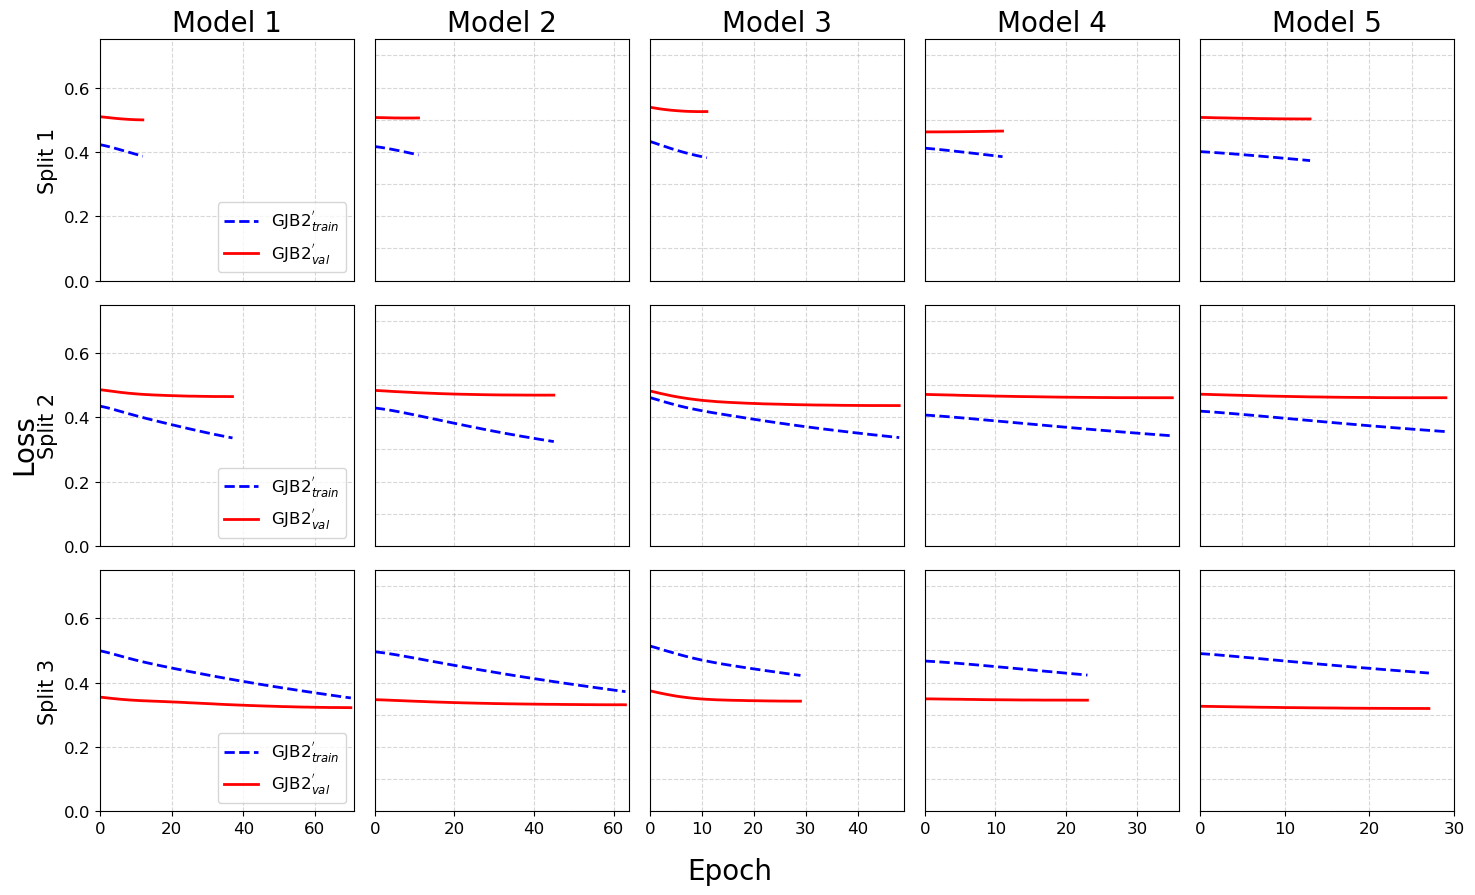

In [11]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_GJB2_full, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['loss'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['val_loss'], 'r-', linewidth=2)
        axs[split_idx, model_idx].set_ylim(0, 0.75)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.5)
    axs[split_idx, 0].legend([r"GJB2$_{train}^{'}$", r"GJB2$_{val}^{'}$"], fontsize=12, loc='lower right')


for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50) 

# fig.suptitle('Training history of GJB2 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Loss', fontsize=20)
fig.tight_layout()
plt.show()

## Predictions of unknown GJB2 SAVs

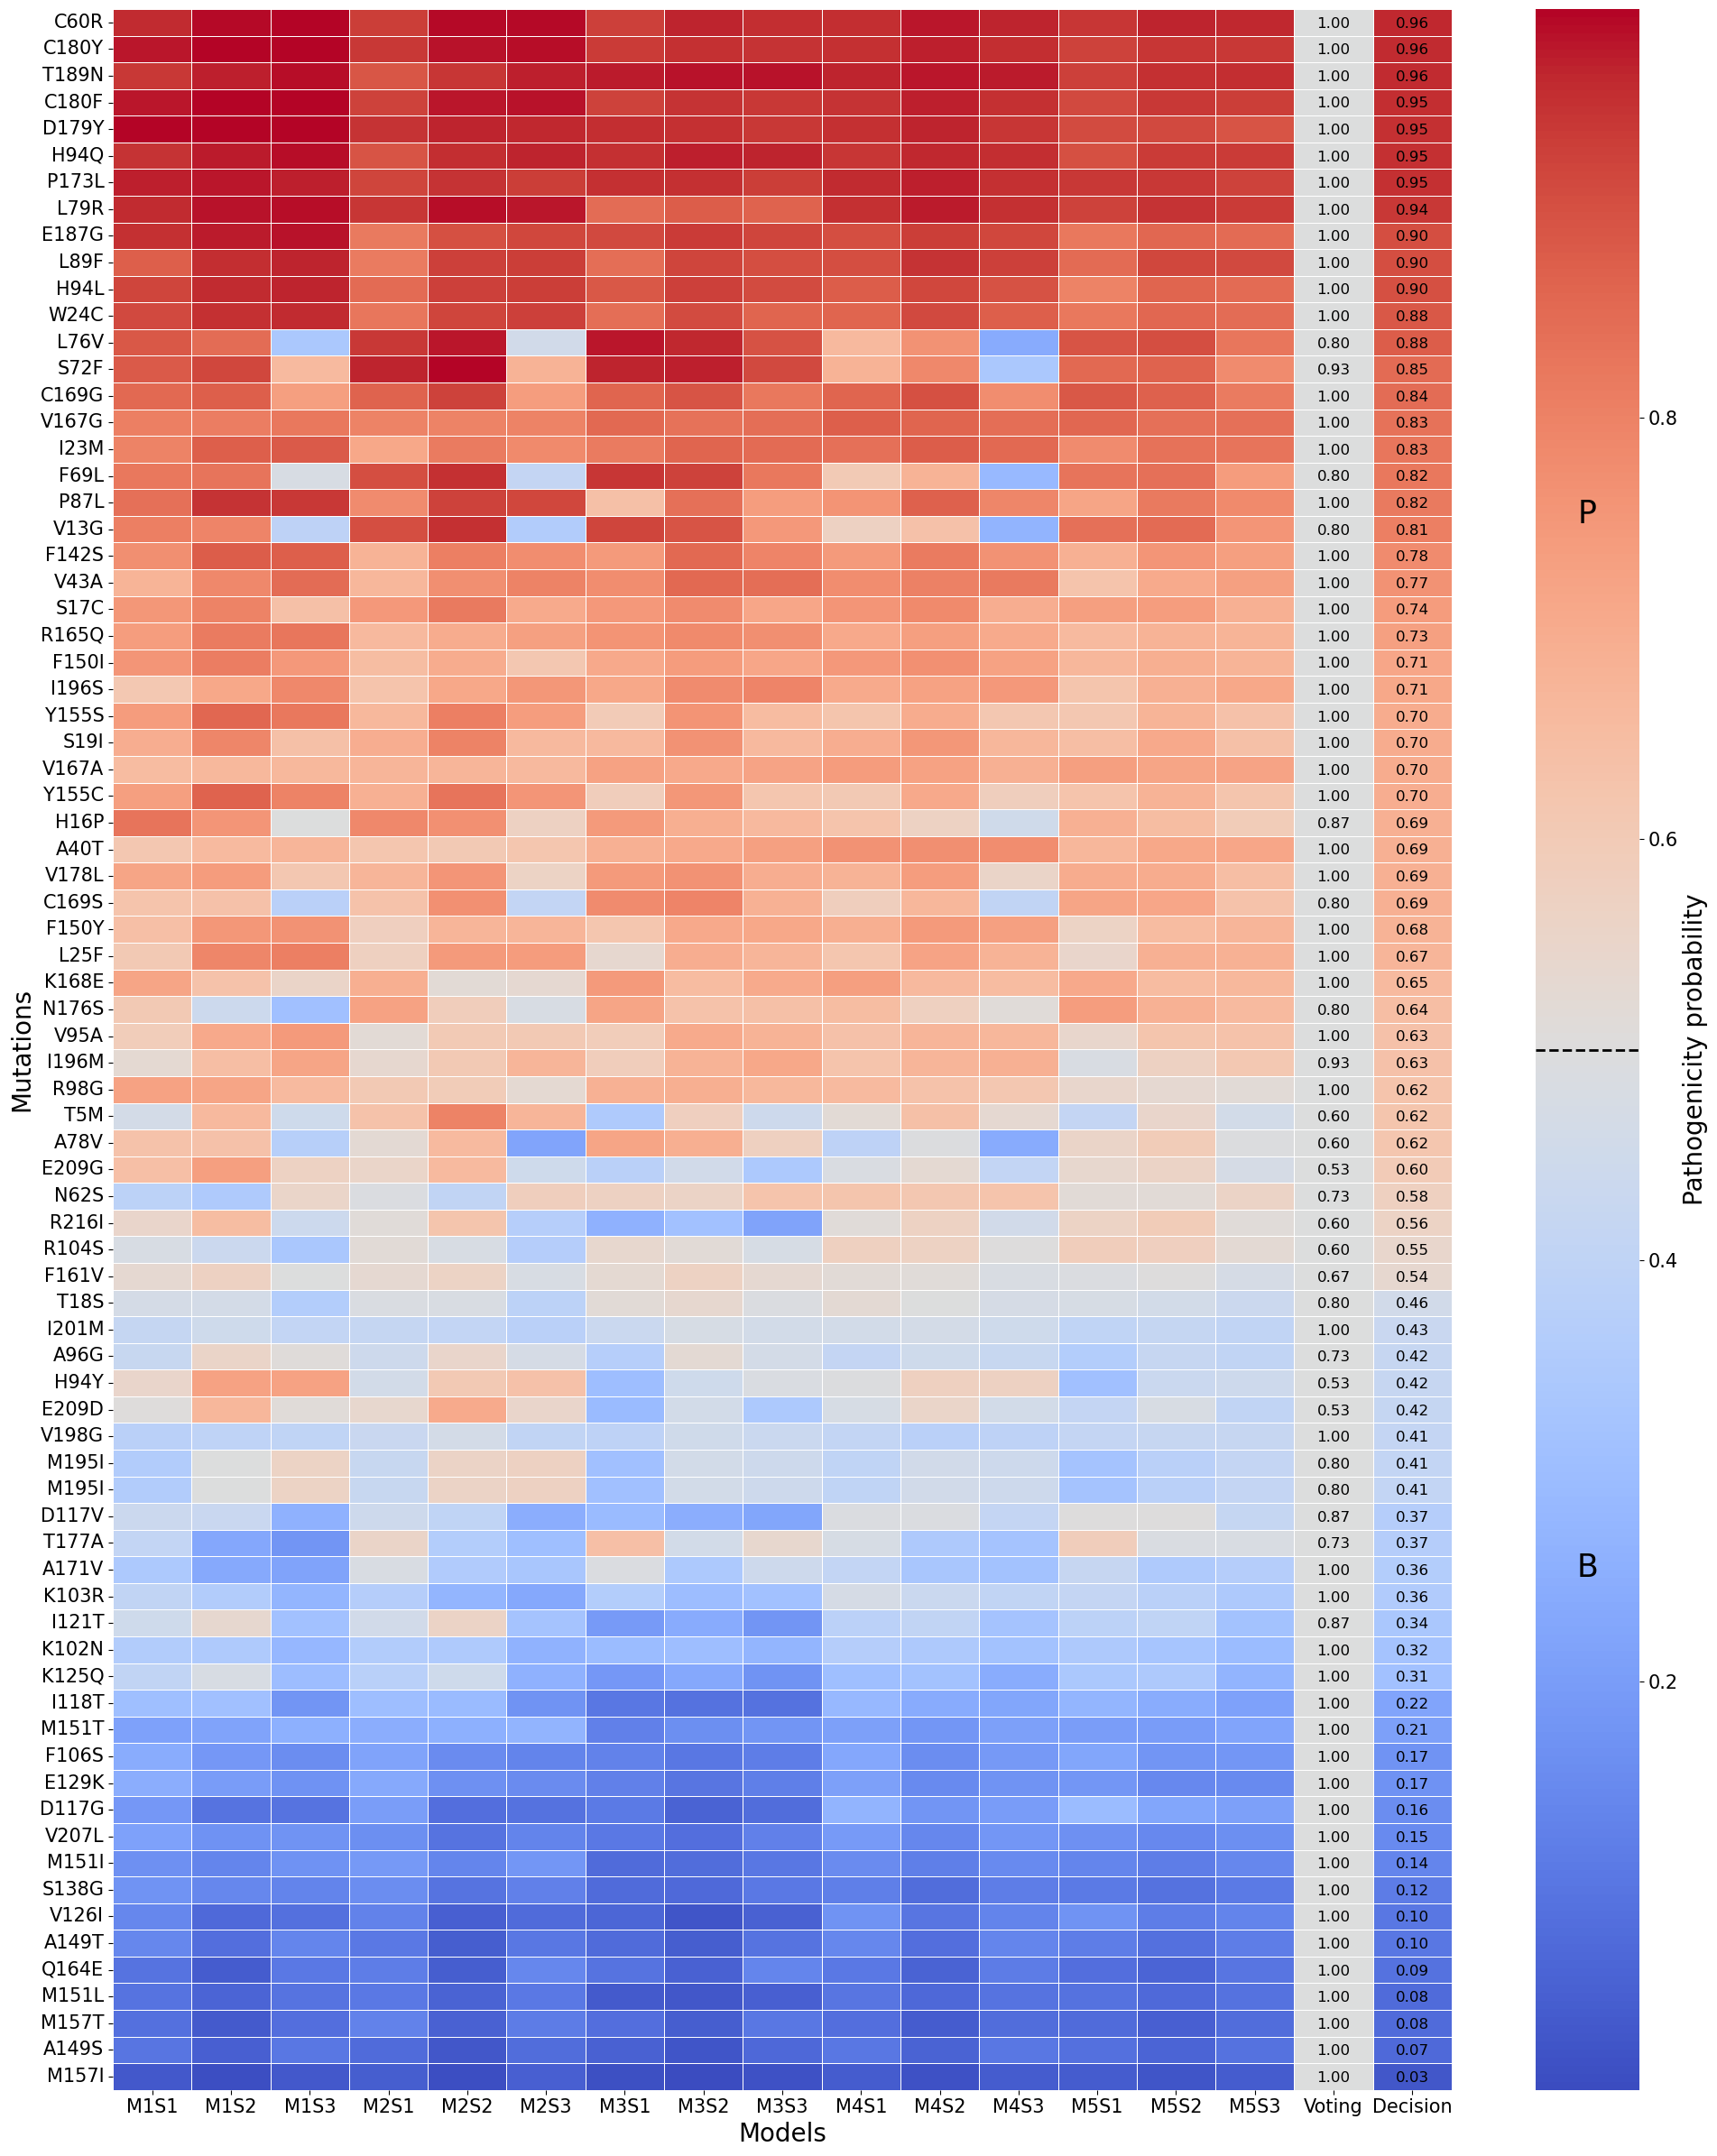

In [8]:
import pandas as pd
GJB2_nan_pathogenicity_pred = pd.read_csv(os.path.join(transfer_GJB2_full, 'GJB2_nan_pathogenicity_pred_total.csv'))
GJB2_nan_pathogenicity_prob = pd.read_csv(os.path.join(transfer_GJB2_full, 'GJB2_nan_pathogenicity_prob_total.csv'))

# Sort GJB2_nan_pathogenicity_pred by final_prob
GJB2_nan_pathogenicity_pred = GJB2_nan_pathogenicity_pred.sort_values(by='final_prob', ascending=False)
# GJB2_nan_pathogenicity_prob reindex based on GJB2_nan_pathogenicity_pred
GJB2_nan_pathogenicity_prob = GJB2_nan_pathogenicity_prob.reindex(GJB2_nan_pathogenicity_pred.index)

GJB2_nan_pathogenicity_pred = GJB2_nan_pathogenicity_pred.reset_index(drop=True)
GJB2_nan_pathogenicity_prob = GJB2_nan_pathogenicity_prob.reset_index(drop=True)

GJB2_nan_pathogenicity_pred.head(2)

mutation = []
for i, row in GJB2_nan_pathogenicity_pred.iterrows():
    SAV_coord = row['SAV_coords'].split()
    mutation.append(f'{SAV_coord[2]}{SAV_coord[1]}{SAV_coord[3]}')

data = GJB2_nan_pathogenicity_prob[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']]

# Add GJB2_nan_pathogenicity_pred['final_prob'] to data
data['ratio'] = 0.5
data['final_prob'] = GJB2_nan_pathogenicity_pred['final_prob']
voting = GJB2_nan_pathogenicity_pred['ratio']
data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the figure: 
# x-axis: SAV_coords, y-axis: 15 models prediction 

models = list(range(1, 16))
models = models + ['Voting'] + ['Decision'] 

plt.figure(figsize=(20, 24))
ax = sns.heatmap(data, cmap='coolwarm', cbar_kws={'label': 'Pathogenicity probability'}, 
                 linewidths=0.5,
                 )

# y-axis: mutation
# x-axis: models

# Customize the y-axis labels
ax.set_yticks(np.arange(len(mutation)) + 0.5)
ax.set_yticklabels(mutation, rotation=0)


x_ticks = ['M1S1', 'M1S2', 'M1S3', 'M2S1', 'M2S2', 'M2S3', 'M3S1', 'M3S2', 'M3S3', 'M4S1', 'M4S2', 'M4S3', 'M5S1', 'M5S2', 'M5S3', 'Voting', 'Decision']

# Customize the x-axis labels
ax.set_xticks(np.arange(len(models)) + 0.5)
# ax.set_xticklabels(models, rotation=0)
ax.set_xticklabels(x_ticks, rotation=0)

# Print the value of 'Decision' cell
for i in range(len(mutation)):
    ax.text(16.5, i+0.7, f'{data["final_prob"][i]:.2f}', fontsize=12, color='black', ha='center')

for i in range(len(mutation)):
    ax.text(15.5, i+0.7, f'{voting[i]:.2f}', fontsize=12, color='black', ha='center')

plt.xlabel('Models', fontsize=20)
plt.ylabel('Mutations', fontsize=20)
# plt.title('Pathogenicity prediction of GJB2 SAVs', fontsize=20)

# Size of color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

# Font size of cbar_kws
cbar.ax.yaxis.label.set_size(20)

# Please make a prediction to clearly show these VUS is predicted a pathogenic “P” or benign “B”. 
# Please mark P and B beside the color bar. 
# Separate the color bar into 2 parts: P and B, using dashed line.
cbar.set_ticks([0.2, 0.4, 0.6, 0.8])
cbar.ax.axhline(0.5, color='black', linestyle='--', linewidth=2)
cbar.ax.text(0.5, 0.25, 'B', fontsize=25, color='black', ha='center')
cbar.ax.text(0.5, 0.75, 'P', fontsize=25, color='black', ha='center')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


## RYR1

In [5]:
import pandas as pd
stop_epoch = []
for model in range(5):
    history_files = [os.path.join(transfer_RYR1, f'model_{model}', f'history_fold_{i}.csv') for i in range(3)]
    history_data = [pd.read_csv(file) for file in history_files]
    max_length = max(len(history) for history in history_data)
    stop_epoch.append(max_length)
stop_epoch

[217, 213, 260, 238, 241]

Validation: t = 2.38, p = 0.03
Test: t = 7.40, p = 0.00
RYR1_val: t = -8.29, p = 0.00
RYR1_test: t = -7.25, p = 0.00
RYR1_val_accuracy improves 12.04% in average
RYR1_test_accuracy improves 12.82% in average


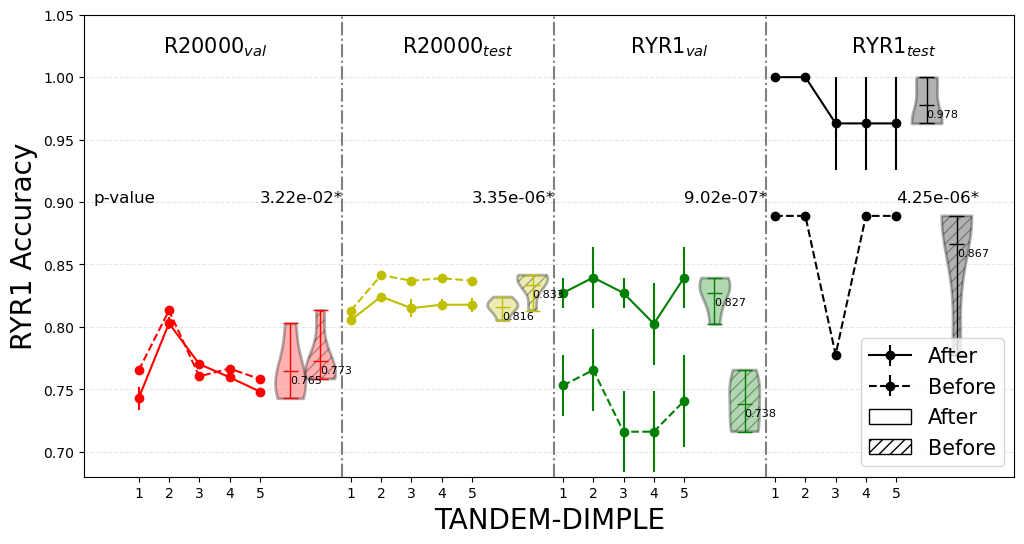

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_baseline = pd.read_csv(f'{transfer_RYR1}/baseline.csv')
df_best = pd.read_csv(f'{transfer_RYR1}/best.csv')
index = ' '.join([f'mean_{i} std_{i} sem_{i}' for i in range(5)]).split()
df_baseline.index = index
df_best.index = index

# Extract data
def extract_data(df, prefix, metrics):
    return [[df.loc[f'{prefix}_{i}'][metric] for i in range(5)] for metric in metrics]

metrics = ['val_accuracy', 'test_accuracy', 'RYR1_val_accuracy', 'RYR1_test_accuracy']
best_data = extract_data(df_best, 'mean', metrics)
best_errors = extract_data(df_best, 'sem', metrics)
base_data = extract_data(df_baseline, 'mean', metrics)
base_errors = extract_data(df_baseline, 'sem', metrics)

# Calculate t-test
from scipy.stats import ttest_ind, ttest_rel
before_transfer = os.path.join(transfer_RYR1, 'before_transfer.csv')
after_transfer = os.path.join(transfer_RYR1, 'after_transfer.csv')
df_before_transfer = pd.read_csv(before_transfer)
df_after_transfer = pd.read_csv(after_transfer)
df_before_transfer = df_before_transfer[metrics]
df_after_transfer = df_after_transfer[metrics]
t_val = ttest_rel(df_before_transfer['val_accuracy'], df_after_transfer['val_accuracy'])
t_test = ttest_rel(df_before_transfer['test_accuracy'], df_after_transfer['test_accuracy'])
t_RYR1_val = ttest_rel(df_before_transfer['RYR1_val_accuracy'], df_after_transfer['RYR1_val_accuracy'])
t_RYR1_test = ttest_rel(df_before_transfer['RYR1_test_accuracy'], df_after_transfer['RYR1_test_accuracy'])

print(f'Validation: t = {t_val.statistic:.2f}, p = {t_val.pvalue:.2f}')
print(f'Test: t = {t_test.statistic:.2f}, p = {t_test.pvalue:.2f}')
print(f'RYR1_val: t = {t_RYR1_val.statistic:.2f}, p = {t_RYR1_val.pvalue:.2f}')
print(f'RYR1_test: t = {t_RYR1_test.statistic:.2f}, p = {t_RYR1_test.pvalue:.2f}')

# Plot data
plt.figure(figsize=(12, 6))
index = np.arange(5)
colors = ['r', 'y', 'g', 'k']
labels = ['Validation', 'Test', 'RYR1 Validation', 'RYR1 Test']
positions = [0, 7, 14, 21]

# Plot p-values
for i, (p, pos) in enumerate(zip([t_val.pvalue, t_test.pvalue, t_RYR1_val.pvalue, t_RYR1_test.pvalue], positions)):
    if p < 0.05:
        plt.text(pos+4, 0.9, f'{p:.2e}*', fontsize=12, color='black')
    elif np.isnan(p):
        continue
    else:
        plt.text(pos+4, 0.9, f'{p:.2e}', fontsize=12, color='black')
plt.text(-1.5, 0.9, 'p-value', fontsize=12, color='black')

for i, (best, base, best_err, base_err, color, label, pos) in enumerate(zip(best_data, base_data, best_errors, base_errors, colors, labels, positions)):
    plt.errorbar([x + pos for x in index], best, yerr=best_err, fmt=f'{color}-o')
    plt.errorbar([x + pos for x in index], base, yerr=base_err, fmt=f'{color}--o')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.text(pos+5, np.mean(best)-0.01, f'{np.mean(best):.3f}', fontsize=8, color='black')
    plt.text(pos+6, np.mean(base)-0.01, f'{np.mean(base):.3f}', fontsize=8, color='black')
    parts = plt.violinplot([best, base], positions=[pos+5, pos+6], widths=1, showmeans=True, showextrema=True)
    parts['bodies'][1].set_hatch('///')
    for pc in parts['bodies']:
        pc.set_linewidth(2)
        pc.set_facecolor(color)
        pc.set_edgecolor('black')   
        pc.set_linestyle('solid')
    for partname in ('cbars', 'cmaxes', 'cmins', 'cmeans'):
        parts[partname].set_edgecolor(color)
        parts[partname].set_linewidth(1)

RYR1_val_imp = np.mean([best_data[2][i] - base_data[2][i] for i in range(5)]) / np.mean(base_data[2])
RYR1_test_imp = np.mean([best_data[3][i] - base_data[3][i] for i in range(5)]) / np.mean(base_data[3])
print(f'RYR1_val_accuracy improves {RYR1_val_imp:.2%} in average')
print(f'RYR1_test_accuracy improves {RYR1_test_imp:.2%} in average')

# plt.arrow(19+1, np.mean(best_data[2]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
# plt.arrow(26+1, np.mean(best_data[3]), 0, 0.01, head_width=0.3, head_length=0.02, fc='r', ec='r')
# plt.text(19+1+0.2, np.mean(best_data[2]), f'{RYR1_val_imp:.0%}', fontsize=12, color='r')
# plt.text(26+1+0.2, np.mean(best_data[3]), f'{RYR1_test_imp:.0%}', fontsize=12, color='r')

# Add labels
plt.errorbar([], [], yerr=[], fmt='k-o', label='After')
plt.errorbar([], [], yerr=[], fmt='k--o', label='Before')
plt.bar(0, 0, color='w', edgecolor='black', hatch='', label='After')
plt.bar(0, 0, color='w', edgecolor='black', hatch='///', label='Before')
# Customize plot
plt.xlabel('TANDEM-DIMPLE', fontsize=20)
plt.ylabel('RYR1 Accuracy', fontsize=20)
# plt.title('Model performance (transfer learning to RYR1)', fontsize=20)
plt.xticks(labels=['1', '2', '3', '4', '5']*4, ticks=[0, 1, 2, 3, 4, 
                                                    7, 8, 9, 10, 11,
                                                    14, 15, 16, 17, 18,
                                                    21, 22, 23, 24, 25, ])

# Draw the vertical lines at 6.5, 13.5, 20.5
for i in range(3):
    plt.axvline(x=6.7 + 7*i, color='gray', linestyle='-.')

plt.text(0.8, 1.02, r'R20000$_{val}$', fontsize=15, color='black')
plt.text(8.7, 1.02, r'R20000$_{test}$', fontsize=15, color='black')
plt.text(16.2, 1.02, r'RYR1$_{val}$', fontsize=15, color='black')
plt.text(23.5, 1.02, r'RYR1$_{test}$', fontsize=15, color='black')
plt.legend(fontsize=15, loc='lower right')
plt.ylim(0.68, 1.05)
plt.show()

In [10]:
(df_after_transfer['RYR1_test_accuracy'].std() / len(df_after_transfer['RYR1_test_accuracy']))*100, (df_before_transfer['RYR1_test_accuracy'].std() / len(df_before_transfer['RYR1_test_accuracy']))*100


(df_after_transfer['RYR1_test_accuracy'].std() / len(df_after_transfer['RYR1_test_accuracy']))*100

print_format = 'RYR1_val: %.1f±%.1f\nRYR1_test: %.1f±%.1f'
print("After transfer learning")
print(print_format % (df_after_transfer['RYR1_val_accuracy'].mean()*100, 
                      df_after_transfer['RYR1_val_accuracy'].std()*100 / np.sqrt(5),
                      df_after_transfer['RYR1_test_accuracy'].mean()*100, 
                      df_after_transfer['RYR1_test_accuracy'].std()*100 / np.sqrt(5))
)

print("Before transfer learning")
print(print_format % (df_before_transfer['RYR1_val_accuracy'].mean()*100, 
                      df_before_transfer['RYR1_val_accuracy'].std()*100 / np.sqrt(5),
                      df_before_transfer['RYR1_test_accuracy'].mean()*100, 
                      df_before_transfer['RYR1_test_accuracy'].std()*100 / np.sqrt(5)
)
)

After transfer learning
RYR1_val: 82.7±1.6
RYR1_test: 97.8±2.1
Before transfer learning
RYR1_val: 73.8±2.3
RYR1_test: 86.7±2.1


### Other metrics

In [41]:
df_before = pd.read_csv(f'{transfer_RYR1}/before_transfer.csv')
df_before.loc['mean'] = df_before.mean()
df_before.loc['sem'] = df_before.sem()
df_before

print(f'RYR1_val_accuracy: {df_before.loc["mean"]["RYR1_val_accuracy"] * 100:.1f}±{df_before.loc["sem"]["RYR1_val_accuracy"] * 100:.1f}')
print(f'RYR1_val_precision: {df_before.loc["mean"]["RYR1_val_precision"] * 100:.1f}±{df_before.loc["sem"]["RYR1_val_precision"] * 100:.1f}')
print(f'RYR1_val_recall: {df_before.loc["mean"]["RYR1_val_recall"] * 100:.1f}±{df_before.loc["sem"]["RYR1_val_recall"] * 100:.1f}')
print(f'RYR1_val_auc: {df_before.loc["mean"]["RYR1_val_auc"] * 100:.1f}±{df_before.loc["sem"]["RYR1_val_auc"] * 100:.1f}')

print(f'RYR1_test_accuracy: {df_before.loc["mean"]["RYR1_test_accuracy"] * 100:.1f}±{df_before.loc["sem"]["RYR1_test_accuracy"] * 100:.1f}')
print(f'RYR1_test_precision: {df_before.loc["mean"]["RYR1_test_precision"] * 100:.1f}±{df_before.loc["sem"]["RYR1_test_precision"] * 100:.1f}')
print(f'RYR1_test_recall: {df_before.loc["mean"]["RYR1_test_recall"] * 100:.1f}±{df_before.loc["sem"]["RYR1_test_recall"] * 100:.1f}')
print(f'RYR1_test_auc: {df_before.loc["mean"]["RYR1_test_auc"] * 100:.1f}±{df_before.loc["sem"]["RYR1_test_auc"] * 100:.1f}')

print('*'*50)

df_after = pd.read_csv(f'{transfer_RYR1}/after_transfer.csv')
df_after.loc['mean'] = df_after.mean()  
df_after.loc['sem'] = df_after.sem()

print(f'RYR1_val_accuracy: {df_after.loc["mean"]["RYR1_val_accuracy"] * 100:.1f}±{df_after.loc["sem"]["RYR1_val_accuracy"] * 100:.1f}')
print(f'RYR1_val_precision: {df_after.loc["mean"]["RYR1_val_precision"] * 100:.1f}±{df_after.loc["sem"]["RYR1_val_precision"] * 100:.1f}')
print(f'RYR1_val_recall: {df_after.loc["mean"]["RYR1_val_recall"] * 100:.1f}±{df_after.loc["sem"]["RYR1_val_recall"] * 100:.1f}')
print(f'RYR1_val_auc: {df_after.loc["mean"]["RYR1_val_auc"] * 100:.1f}±{df_after.loc["sem"]["RYR1_val_auc"] * 100:.1f}')

print(f'RYR1_test_accuracy: {df_after.loc["mean"]["RYR1_test_accuracy"] * 100:.1f}±{df_after.loc["sem"]["RYR1_test_accuracy"] * 100:.1f}')
print(f'RYR1_test_precision: {df_after.loc["mean"]["RYR1_test_precision"] * 100:.1f}±{df_after.loc["sem"]["RYR1_test_precision"] * 100:.1f}')
print(f'RYR1_test_recall: {df_after.loc["mean"]["RYR1_test_recall"] * 100:.1f}±{df_after.loc["sem"]["RYR1_test_recall"] * 100:.1f}')
print(f'RYR1_test_auc: {df_after.loc["mean"]["RYR1_test_auc"] * 100:.1f}±{df_after.loc["sem"]["RYR1_test_auc"] * 100:.1f}')

RYR1_val_accuracy: 73.8±1.2
RYR1_val_precision: 73.8±1.2
RYR1_val_recall: 73.8±1.2
RYR1_val_auc: 78.5±1.1
RYR1_test_accuracy: 86.7±1.1
RYR1_test_precision: 86.7±1.1
RYR1_test_recall: 86.7±1.1
RYR1_test_auc: 86.3±0.7
**************************************************
RYR1_val_accuracy: 82.7±0.9
RYR1_val_precision: 82.7±0.9
RYR1_val_recall: 82.7±0.9
RYR1_val_auc: 89.1±1.5
RYR1_test_accuracy: 97.8±1.1
RYR1_test_precision: 97.8±1.1
RYR1_test_recall: 97.8±1.1
RYR1_test_auc: 99.4±0.3


#### After transfer learning

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from run import get_seed
seed = get_seed(seed=150)
from sklearn.model_selection import train_test_split
from modules import np_to_dataset, Preprocessing, plot_acc_loss_3fold_CV, Callback_CSVLogger, DelayedEarlyStopping
from sklearn.model_selection import StratifiedKFold


RYR1_val_f1 = []
RYR1_test_f1 = []
# RYR1_notnan_labels = np.argmax(RYR1_notnan_labels, axis=1)
RYR1_knw_labels = np.argmax(RYR1_notnan_labels, axis=1)
# 1. Split GJB2_notnan_ds into 3 folds (60% – 30% – 10%)
# GJB2_x_train, GJB2_x_test, GJB2_y_train, GJB2_y_test = train_test_split(GJB2_notnan_features, GJB2_notnan_labels, test_size=0.1, random_state=seed, stratify=GJB2_notnan_labels)
RYR1_x_train, RYR1_x_test, RYR1_y_train, RYR1_y_test = train_test_split(RYR1_notnan_features, RYR1_knw_labels, test_size=0.1, random_state=seed, stratify=RYR1_knw_labels)
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(RYR1_x_train, RYR1_y_train)):
    x_train, x_val = RYR1_x_train[train_idx], RYR1_x_train[val_idx]
    y_train, y_val = RYR1_y_train[train_idx], RYR1_y_train[val_idx]

    for _dir_ in ['model_0', 'model_1', 'model_2', 'model_3', 'model_4']:
        model_dir = os.path.join(transfer_RYR1, _dir_)
        model_path = os.path.join(model_dir, f'model_fold_{i+1}.h5')
        model = tf.keras.models.load_model(model_path)
        model.compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        # Calculate f1-score
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        RYR1_val_f1.append(f1_score(y_val, val_pred))

        test_pred = model.predict(RYR1_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        RYR1_test_f1.append(f1_score(RYR1_y_test, test_pred))

print(f'RYR1_val_f1: {np.mean(RYR1_val_f1) * 100:.1f}±{np.std(RYR1_val_f1) * 100 / np.sqrt(len(RYR1_val_f1)):.1f}')
print(f'RYR1_test_f1: {np.mean(RYR1_test_f1) * 100:.1f}±{np.std(RYR1_test_f1) * 100 / np.sqrt(len(RYR1_test_f1)):.1f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
RYR1_val_f1: 83.5±1.0
RYR1_test_f1: 97.1±1.5


#### Before transfer learning

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from run import get_seed
seed = get_seed(seed=150)
from sklearn.model_selection import train_test_split
from modules import np_to_dataset, Preprocessing, plot_acc_loss_3fold_CV, Callback_CSVLogger, DelayedEarlyStopping
from sklearn.model_selection import StratifiedKFold

RYR1_val_f1 = []
RYR1_test_f1 = []
# RYR1_notnan_labels = np.argmax(RYR1_notnan_labels, axis=1)
# 1. Split GJB2_notnan_ds into 3 folds (60% – 30% – 10%)
# GJB2_x_train, GJB2_x_test, GJB2_y_train, GJB2_y_test = train_test_split(GJB2_notnan_features, GJB2_notnan_labels, test_size=0.1, random_state=seed, stratify=GJB2_notnan_labels)
RYR1_x_train, RYR1_x_test, RYR1_y_train, RYR1_y_test = train_test_split(RYR1_notnan_features, RYR1_knw_labels, test_size=0.1, random_state=seed, stratify=RYR1_knw_labels)
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(RYR1_x_train, RYR1_y_train)):
    x_train, x_val = RYR1_x_train[train_idx], RYR1_x_train[val_idx]
    y_train, y_val = RYR1_y_train[train_idx], RYR1_y_train[val_idx]

    for j, model in enumerate(_6hl_models):
        # Calculate f1-score
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        RYR1_val_f1.append(f1_score(y_val, val_pred))

        test_pred = model.predict(RYR1_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        RYR1_test_f1.append(f1_score(RYR1_y_test, test_pred))

print(f'RYR1_val_f1: {np.mean(RYR1_val_f1) * 100:.1f}±{np.std(RYR1_val_f1) * 100 / np.sqrt(len(RYR1_val_f1)):.1f}')
print(f'RYR1_test_f1: {np.mean(RYR1_test_f1) * 100:.1f}±{np.std(RYR1_test_f1) * 100 / np.sqrt(len(RYR1_test_f1)):.1f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

#### Confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix

RYR1_val_confusion = dict()
RYR1_test_confusion = dict()
RYR1_x_train, RYR1_x_test, RYR1_y_train, RYR1_y_test = train_test_split(RYR1_notnan_features, RYR1_knw_labels, test_size=0.1, random_state=seed, stratify=RYR1_knw_labels)
kf = StratifiedKFold(n_splits=3, random_state=seed, shuffle=True)
for i, (train_idx, val_idx) in enumerate(kf.split(RYR1_x_train, RYR1_y_train)):
    x_train, x_val = RYR1_x_train[train_idx], RYR1_x_train[val_idx]
    y_train, y_val = RYR1_y_train[train_idx], RYR1_y_train[val_idx]

    RYR1_val_confusion[i] = []
    RYR1_test_confusion[i] = []

    for _dir_ in ['model_0', 'model_1', 'model_2', 'model_3', 'model_4']:
        model_dir = os.path.join(transfer_RYR1, _dir_)
        model_path = os.path.join(model_dir, f'model_fold_{i+1}.h5')
        model = tf.keras.models.load_model(model_path)
        model.compile(optimizer=optimizer, loss=cfg.training.loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        # Calculate confusion matrix
        val_pred = model.predict(x_val)
        val_pred = np.argmax(val_pred, axis=1)
        RYR1_val_confusion[i].append(confusion_matrix(y_val, val_pred))

        test_pred = model.predict(RYR1_x_test)
        test_pred = np.argmax(test_pred, axis=1)
        RYR1_test_confusion[i].append(confusion_matrix(RYR1_y_test, test_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [48]:
RYR1_val_confusion_norm = dict()
RYR1_val_confusion_text = dict()
for k in RYR1_val_confusion.keys():
    _confusion_matrix_ = RYR1_val_confusion[k]
    _confusion_matrix_norm_ = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in _confusion_matrix_]
    RYR1_val_confusion_norm[k] = _confusion_matrix_norm_
    RYR1_val_confusion_text[k] = with_and_without_norm_confusion_matrix(_confusion_matrix_, _confusion_matrix_norm_)

RYR1_test_confusion_norm = dict()
RYR1_test_confusion_text = dict()
for k in RYR1_test_confusion.keys():
    _confusion_matrix_ = RYR1_test_confusion[k]
    _confusion_matrix_norm_ = [confusion / confusion.sum(axis=1)[:, np.newaxis] for confusion in _confusion_matrix_]
    RYR1_test_confusion_norm[k] = _confusion_matrix_norm_
    RYR1_test_confusion_text[k] = with_and_without_norm_confusion_matrix(_confusion_matrix_, _confusion_matrix_norm_)

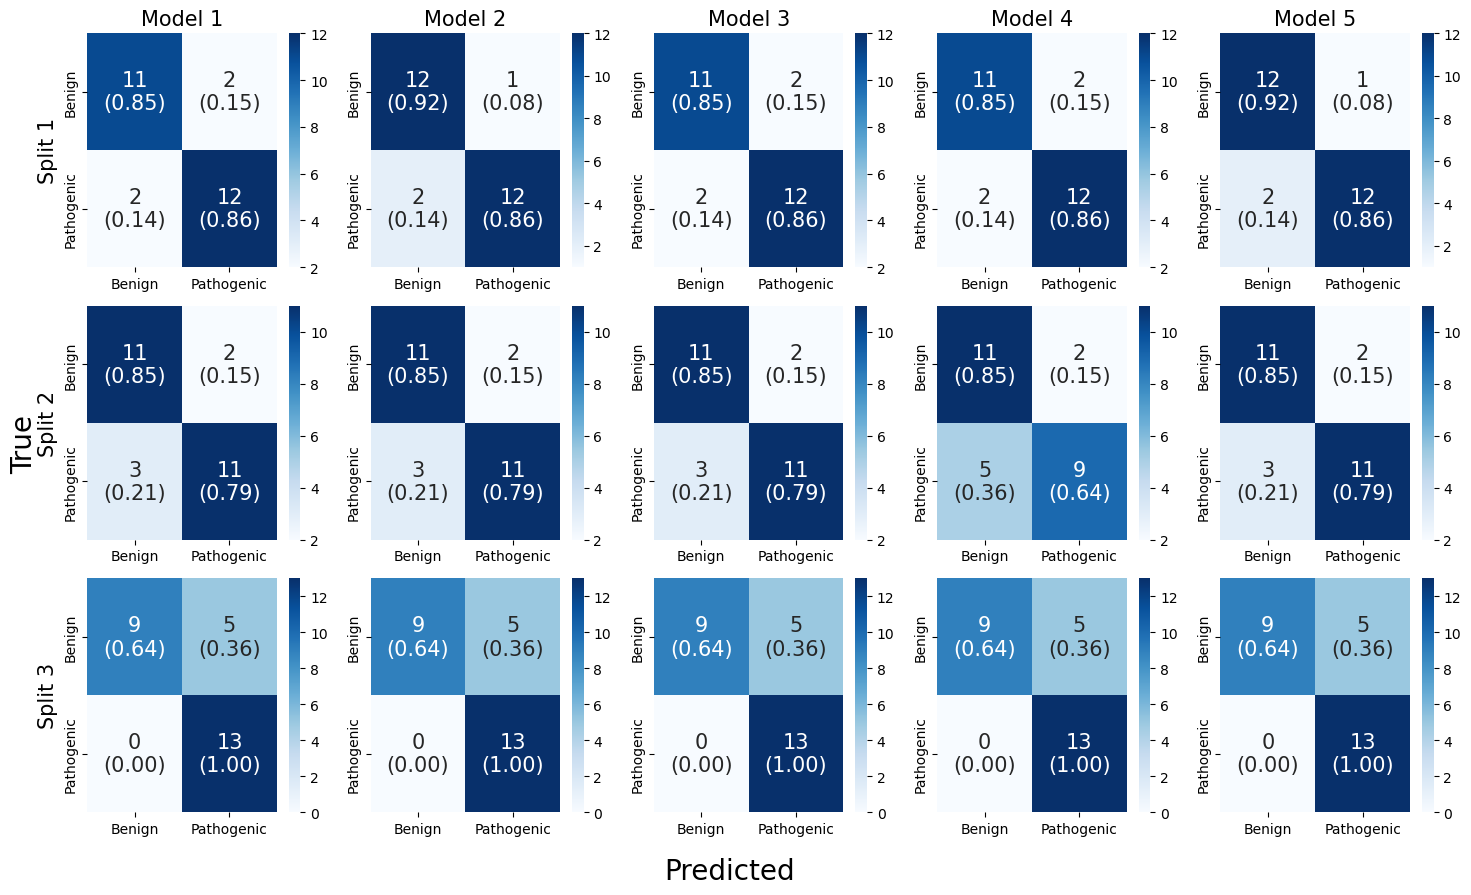

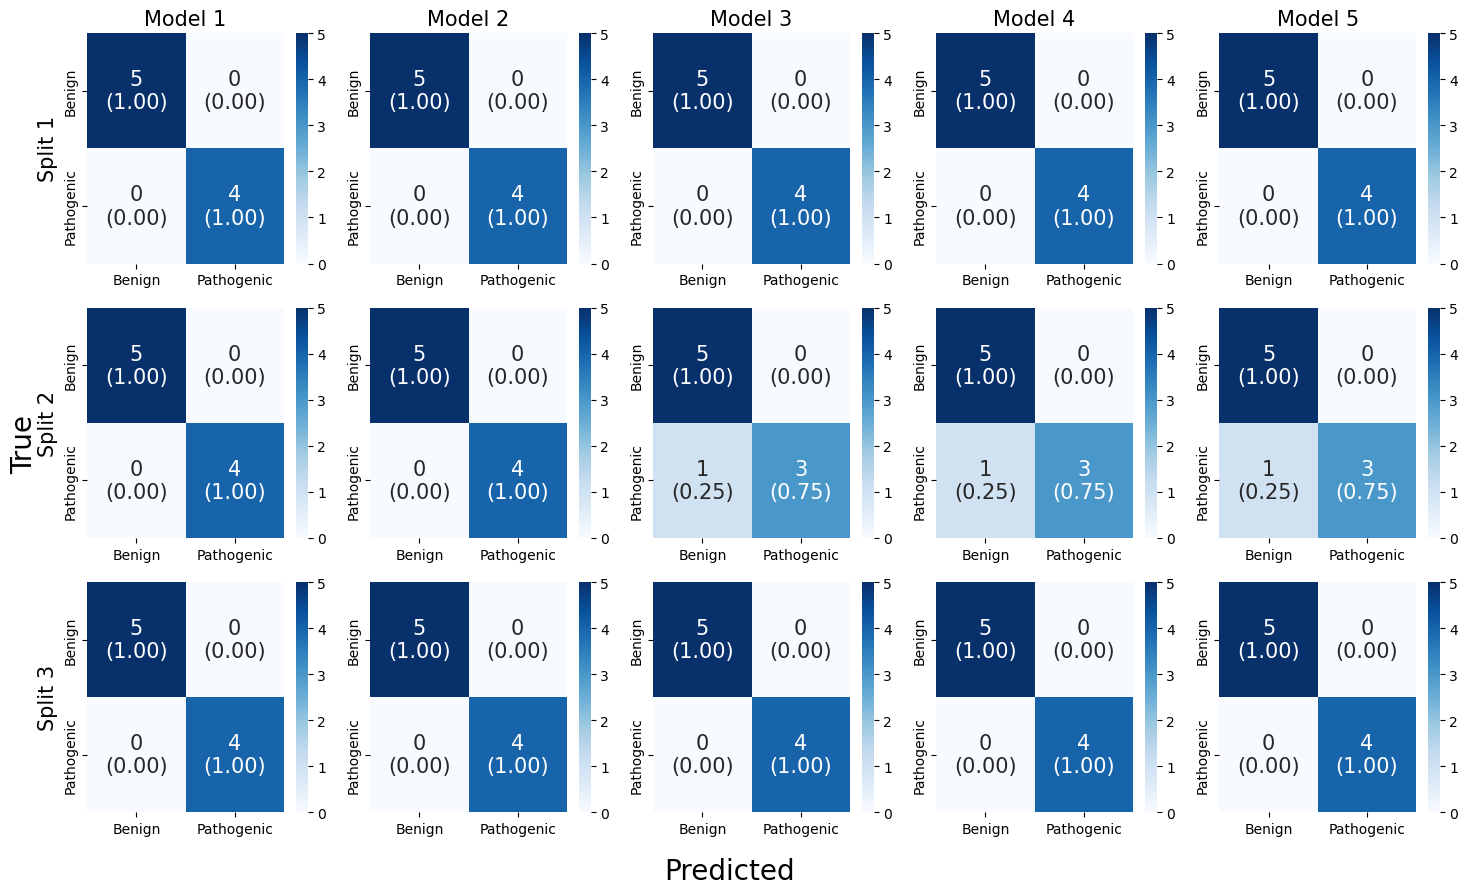

In [49]:
# Plot confusion matrix
# 3 rows: Split 1, Split 2, Split 3
# 5 columns: Model 1, Model 2, Model 3, Model 4, Model 5
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')


fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for row in range(3):
    for col in range(5):
        sns.heatmap(RYR1_val_confusion[row][col], 
                    annot=RYR1_val_confusion_text[row][col], 
                    fmt='', cmap='Blues', ax=axs[row, col], 
                    xticklabels=['Benign', 'Pathogenic'], 
                    yticklabels=['Benign', 'Pathogenic'], 
                    annot_kws={"fontsize":15})

# Label for each row
axs[0, 0].set_ylabel('Split 1', fontsize=15)
axs[1, 0].set_ylabel('Split 2', fontsize=15)
axs[2, 0].set_ylabel('Split 3', fontsize=15)

# Label for each column
axs[0, 0].set_title('Model 1', fontsize=15)
axs[0, 1].set_title('Model 2', fontsize=15)
axs[0, 2].set_title('Model 3', fontsize=15)
axs[0, 3].set_title('Model 4', fontsize=15)
axs[0, 4].set_title('Model 5', fontsize=15)

fig.supxlabel('Predicted', fontsize=20)
fig.supylabel('True', fontsize=20)
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for row in range(3):
    for col in range(5):
        sns.heatmap(RYR1_test_confusion[row][col], 
                    annot=RYR1_test_confusion_text[row][col], 
                    fmt='', cmap='Blues', ax=axs[row, col], 
                    xticklabels=['Benign', 'Pathogenic'], 
                    yticklabels=['Benign', 'Pathogenic'], 
                    annot_kws={"fontsize":15})

# Label for each row
axs[0, 0].set_ylabel('Split 1', fontsize=15)
axs[1, 0].set_ylabel('Split 2', fontsize=15)
axs[2, 0].set_ylabel('Split 3', fontsize=15)

# Label for each column
axs[0, 0].set_title('Model 1', fontsize=15)
axs[0, 1].set_title('Model 2', fontsize=15)
axs[0, 2].set_title('Model 3', fontsize=15)
axs[0, 3].set_title('Model 4', fontsize=15)
axs[0, 4].set_title('Model 5', fontsize=15)

fig.supxlabel('Predicted', fontsize=20)
fig.supylabel('True', fontsize=20)
fig.tight_layout()
plt.show()

### Training history

#### Accuracy

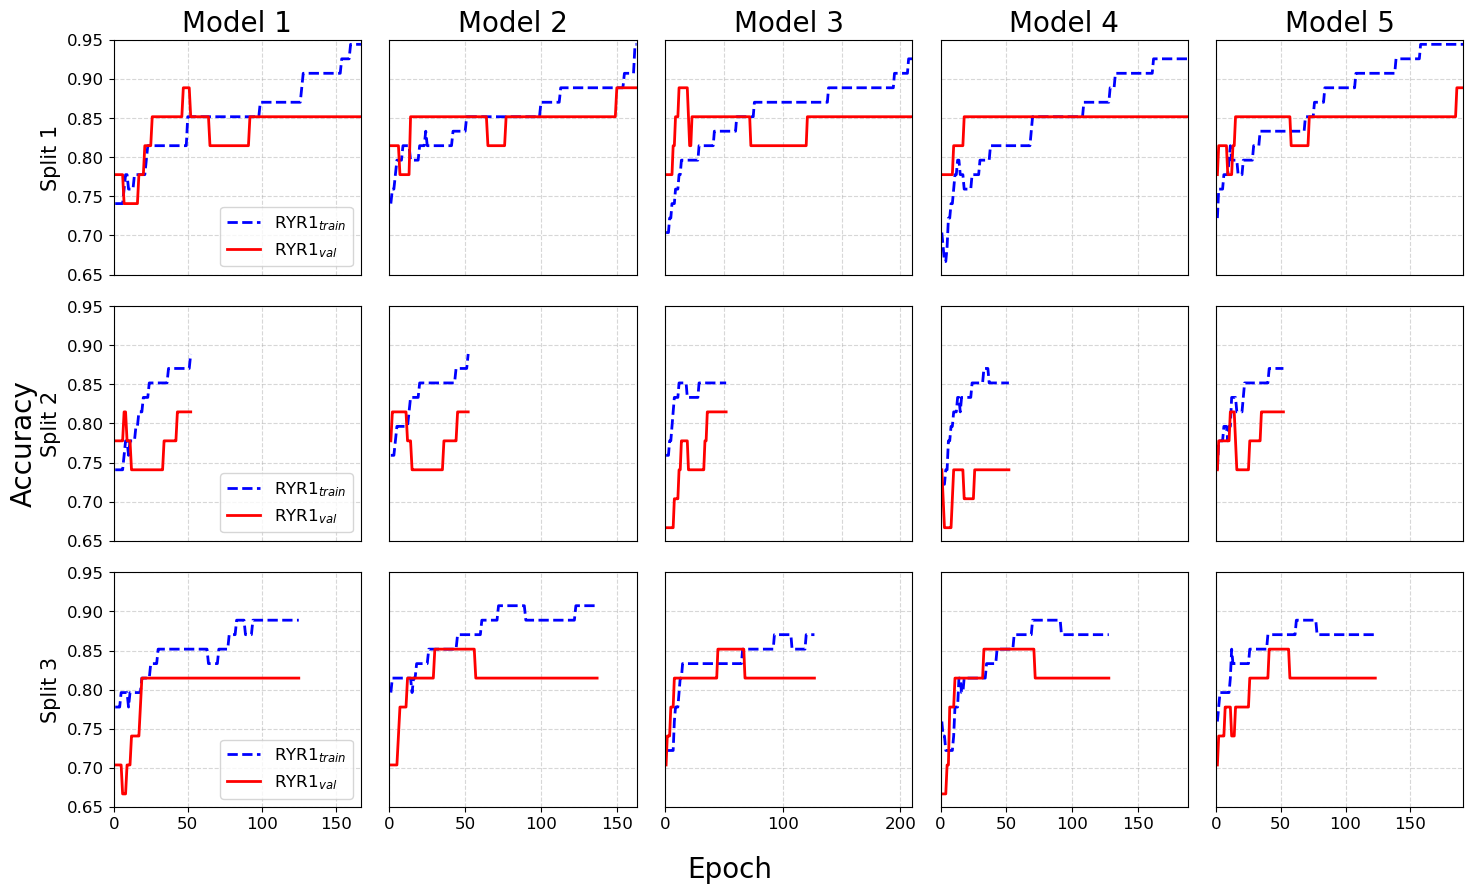

In [17]:
# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_RYR1, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['RYR1_train_accuracy'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['RYR1_val_accuracy'], 'r-', linewidth=2)
        axs[split_idx, model_idx].set_ylim(0.65, 0.95)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.5)
    axs[split_idx, 0].legend([r'RYR1$_{train}$', r'RYR1$_{val}$'], fontsize=12, loc='lower right')


for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50)

# fig.suptitle('Training history of RYR1 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Accuracy', fontsize=20)
fig.tight_layout(pad=1.2)
plt.show()


#### Losss

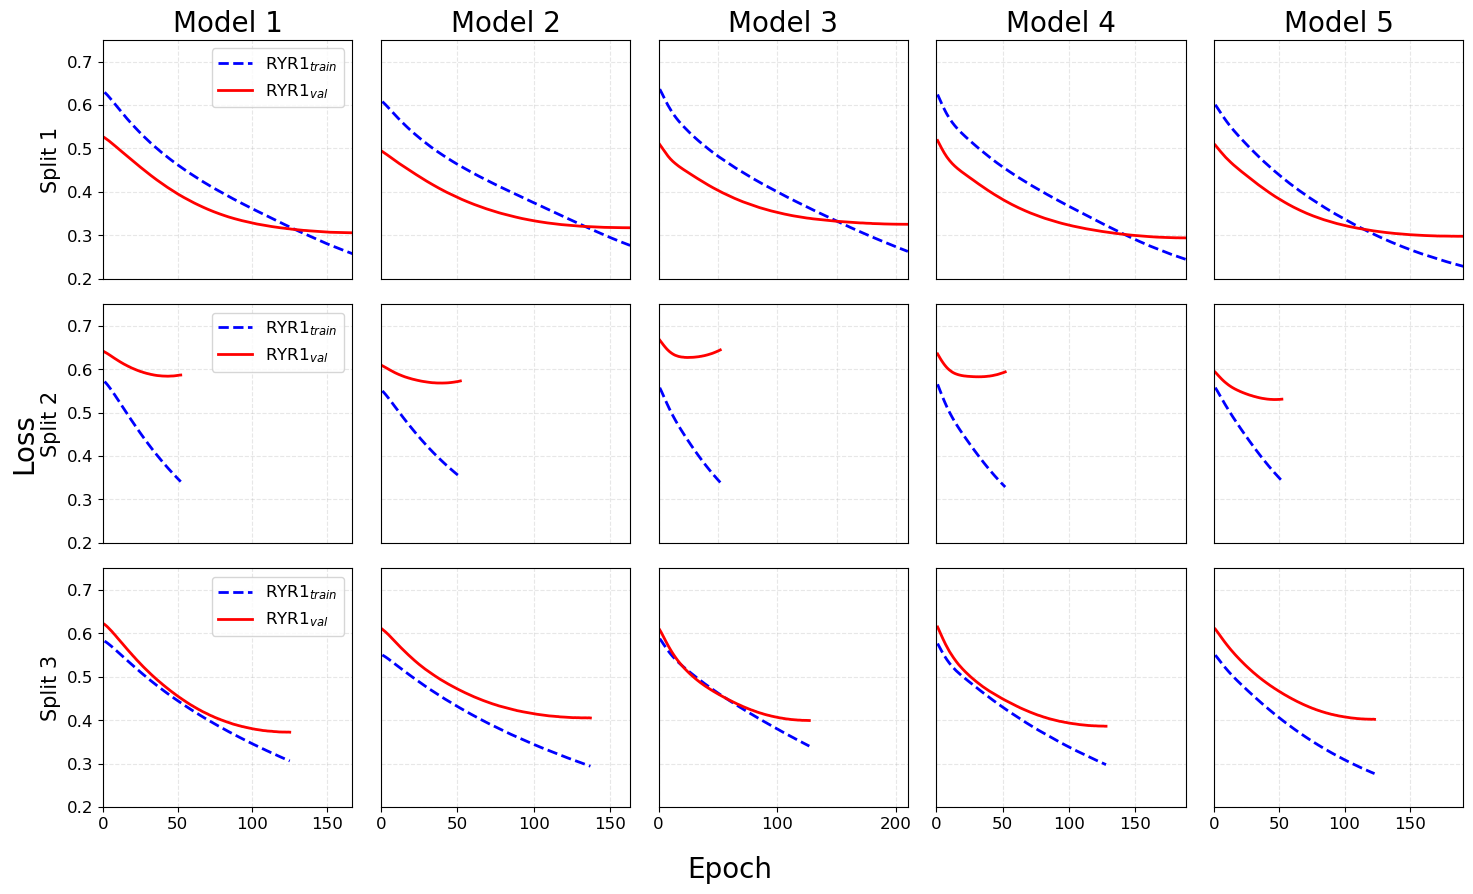

In [18]:
# Plot multiple figures in once: 
# 5 columns, 3 rows
# columns: model 1, model 2, model 3, model 4, model 5
# rows: split 1, split 2, split 3
row = 3 ; col = 5
fig, axs = plt.subplots(row, col, figsize=(15, 9))
for split_idx in range(row):
    for model_idx in range(col):
        history = os.path.join(transfer_RYR1, f'model_{model_idx}', f'history_fold_{split_idx}.csv')
        df_history = pd.read_csv(history)
        df_history = df_history.iloc[:-50]
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['RYR1_train_loss'], 'b--', linewidth=2)
        axs[split_idx, model_idx].plot(df_history['epoch'], df_history['RYR1_val_loss'], 'r-', linewidth=2)
        axs[split_idx, model_idx].set_ylim(0.2, 0.75)
        axs[split_idx, model_idx].grid(axis='both', linestyle='--', alpha=0.3)
    axs[split_idx, 0].legend([r'RYR1$_{train}$', r'RYR1$_{val}$'], fontsize=12)

for col, ax in enumerate(axs[0]):
    ax.set_title(f'Model {col+1}', fontsize=20)
for row, ax in enumerate(axs):
    ax[0].set_ylabel(f'Split {row+1}', fontsize=15)

# Remove y-ticks for all subplots except the first column
for ax in axs.ravel():
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for ax in axs[:, 0]:
    ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=12)

# Remove x-ticks for all subplots except the last row
for ax in axs[:-1, :].ravel():
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for ax in axs[-1, :]:
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

# Adjust the range of x-axis of all subplots: based on stop_epoch
for col in range(5): 
    for row in range(axs.shape[0]):
        axs[row, col].set_xlim(0, stop_epoch[col] - 50)

# fig.suptitle('Training history of RYR1 transfer learning', fontsize=20)
fig.supxlabel('Epoch', fontsize=20)
fig.supylabel('Loss', fontsize=20)
fig.tight_layout(pad=1.2)
plt.show()

### Predict UNK RYR1 SAVs

In [31]:
RYR1_nan_pathogenicity_pred = pd.read_csv(os.path.join(transfer_RYR1, 'RYR1_nan_pathogenicity_pred_total.csv'))
RYR1_nan_pathogenicity_prob = pd.read_csv(os.path.join(transfer_RYR1, 'RYR1_nan_pathogenicity_prob_total.csv'))
RYR1_nan_pathogenicity_pred

RYR1_nan_pathogenicity_pred = RYR1_nan_pathogenicity_pred.sort_values(by='final_prob', ascending=False)
RYR1_nan_pathogenicity_prob = RYR1_nan_pathogenicity_prob.reindex(RYR1_nan_pathogenicity_pred.index)
RYR1_nan_pathogenicity_pred = RYR1_nan_pathogenicity_pred.reset_index(drop=True)
RYR1_nan_pathogenicity_prob = RYR1_nan_pathogenicity_prob.reset_index(drop=True)
RYR1_nan_pathogenicity_pred.head(2)

,SAV_coords,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,final,ratio,final_prob,final_prob_sem
0,P21817 2237 C Y,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,0.985280,0.004655
1,P21817 2363 C W,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,0.977669,0.006121


In [32]:
mutation = []
for i, row in RYR1_nan_pathogenicity_pred.iterrows():
    SAV_coord = row['SAV_coords'].split()
    mutation.append(f'{SAV_coord[2]}{SAV_coord[1]}{SAV_coord[3]}')

data = RYR1_nan_pathogenicity_prob[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']]
data['ratio'] = 0.5
data['final_prob'] = RYR1_nan_pathogenicity_pred['final_prob']
voting = RYR1_nan_pathogenicity_pred['ratio']
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,ratio,final_prob
0,0.996355,0.962296,0.994288,0.995614,0.947658,0.997480,0.997898,0.957253,0.992930,0.998683,0.968571,0.997837,0.999577,0.973709,0.999052,0.5,0.985280
1,0.995403,0.968614,0.993746,0.988453,0.943124,0.993265,0.993319,0.933029,0.985045,0.993107,0.937592,0.991466,0.998229,0.954103,0.996537,0.5,0.977669


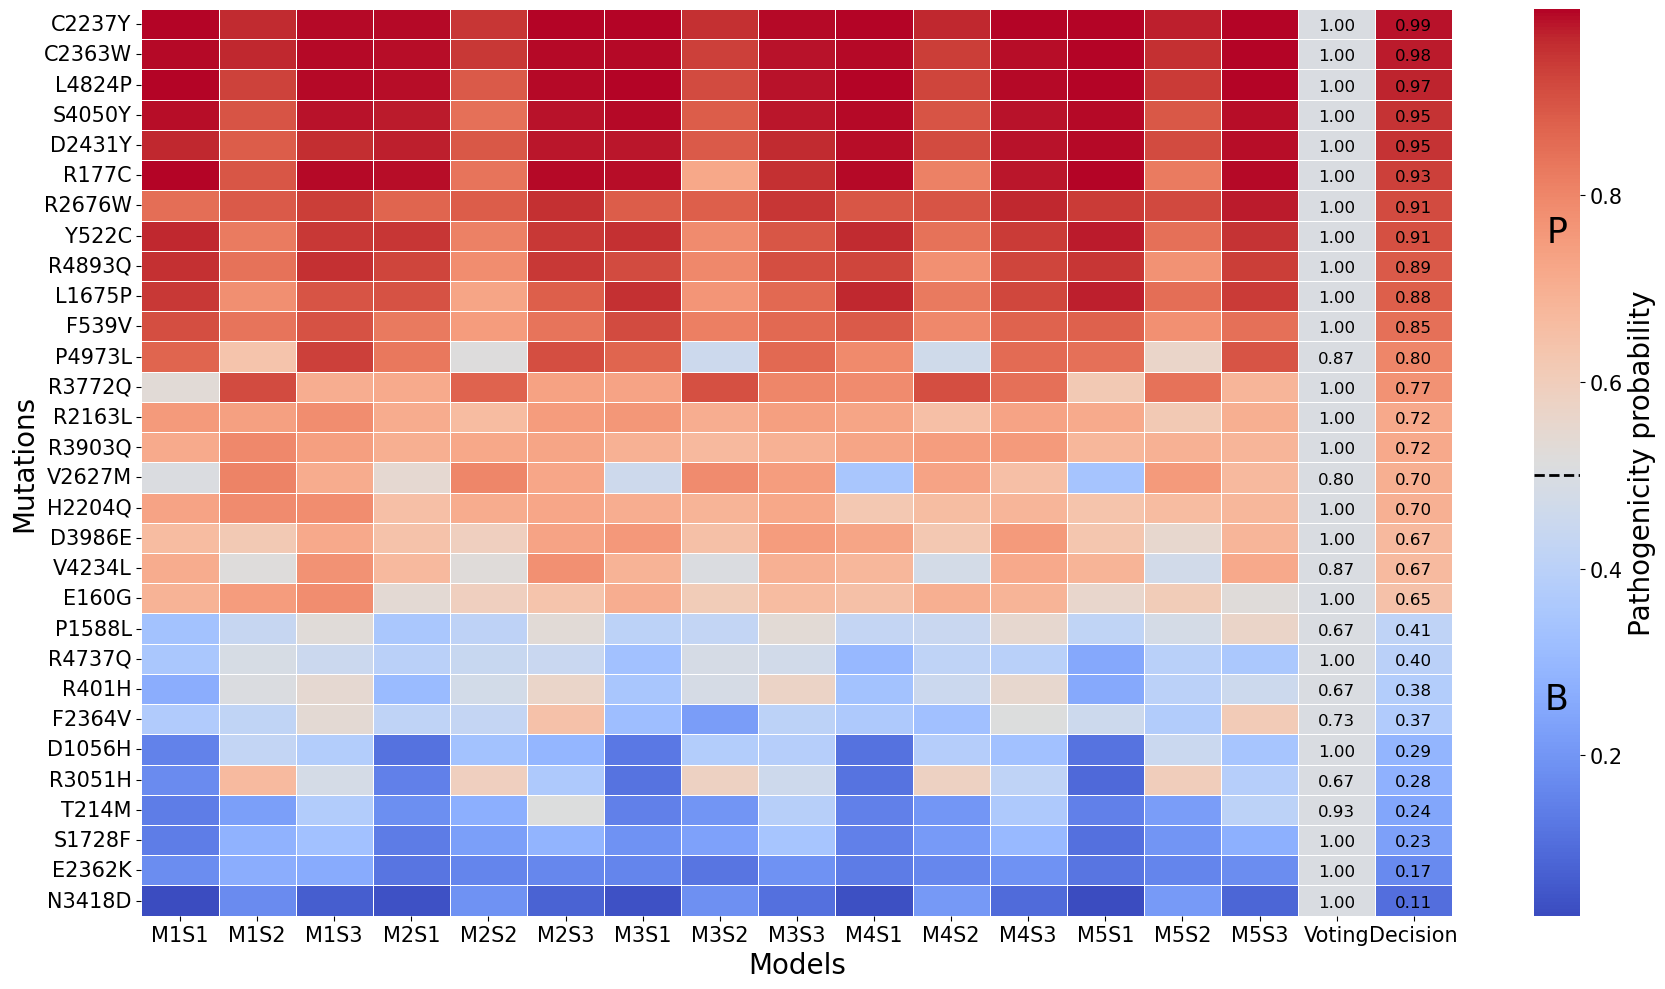

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the figure:
# x-axis: SAV_coords, y-axis: 15 models prediction

models = list(range(1, 16))
models = models + ['Voting'] + ['Decision']

plt.figure(figsize=(18, 10))
ax = sns.heatmap(data, cmap='coolwarm', cbar_kws={'label': 'Pathogenicity probability'}, 
                 linewidths=0.5,
                 )

# y-axis: mutation
# x-axis: models

# Customize the y-axis labels
ax.set_yticks(np.arange(len(mutation)) + 0.5)
ax.set_yticklabels(mutation, rotation=0)

x_ticks = ['M1S1', 'M1S2', 'M1S3', 'M2S1', 'M2S2', 'M2S3', 'M3S1', 'M3S2', 'M3S3', 'M4S1', 'M4S2', 'M4S3', 'M5S1', 'M5S2', 'M5S3', 'Voting', 'Decision']
ax.set_xticks(np.arange(len(models)) + 0.5)
ax.set_xticklabels(x_ticks, rotation=0)

# # Customize the x-axis labels
# ax.set_xticks(np.arange(len(models)) + 0.5)
# ax.set_xticklabels(models, rotation=0)

# Print the value of 'Decision' cell
for i in range(len(mutation)):
    ax.text(16.5, i+0.7, f'{data["final_prob"][i]:.2f}', fontsize=12, color='black', ha='center')

for i in range(len(mutation)):
    ax.text(15.5, i+0.7, f'{voting[i]:.2f}', fontsize=12, color='black', ha='center')

plt.xlabel('Models', fontsize=20)
plt.ylabel('Mutations', fontsize=20)
# plt.title('Pathogenicity prediction of RYR1 SAVs', fontsize=20)

# Size of color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

cbar.set_ticks([0.2, 0.4, 0.6, 0.8])
cbar.ax.axhline(0.5, color='black', linestyle='--', linewidth=2)
cbar.ax.text(0.5, 0.25, 'B', fontsize=25, color='black', ha='center')
cbar.ax.text(0.5, 0.75, 'P', fontsize=25, color='black', ha='center')

# Font size of cbar_kws
cbar.ax.yaxis.label.set_size(20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()
